# **Agent Recruitment**



---
Submitted By: Simranjeet Singh


## Import libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

## Importing the Data Sets

In [2]:
training_dataset_url="https://raw.githubusercontent.com/sj-singh/AgentRecruitment/main/train_dK8Auve.csv"

df_train=pd.read_csv(training_dataset_url)
df_train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,Level 1,Level 2,3.0,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,Level 1,Level 1,2.0,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,Level 1,Level 3,4.0,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,Level 1,Level 1,2.0,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [3]:
test_dataset_url="https://raw.githubusercontent.com/sj-singh/AgentRecruitment/main/test_UyrvqPb.csv"

df_test=pd.read_csv(test_dataset_url)
df_test.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
0,FIN1009528,284001,7/2/2008,284001.0,M,8/5/1982,S,Salaried,Graduate,5/26/2008,Level 1,Level 1,2.0,Probation,F,10/14/1978,1.0,0.0,0.0,0.0,0.0,0.0
1,FIN1009529,800001,7/2/2008,800026.0,M,3/11/1968,M,Salaried,Graduate,6/24/2008,Level 1,Level 1,2.0,Probation,M,3/3/1971,2.0,0.0,0.0,0.0,0.0,0.0
2,FIN1009530,800001,7/2/2008,NaN,M,12/16/1984,S,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIN1009531,800001,7/2/2008,844112.0,M,6/7/1971,S,Salaried,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FIN1009532,533101,7/2/2008,533102.0,M,7/22/1978,S,NaN,Masters of Business Administration,12/4/2007,Level 2,Level 2,3.0,Confirmation,M,6/23/1977,4.0,1.0,97352.0,3.0,97352.0,3.0


## Basic checks on Data Set

In [4]:
df_train.shape, df_test.shape

((9527, 23), (5045, 22))

In [5]:
df_train.columns, df_test.columns

(Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
        'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
        'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
        'Manager_Joining_Designation', 'Manager_Current_Designation',
        'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
        'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
        'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
        'Business_Sourced'],
       dtype='object'),
 Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
        'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
        'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
        'Manager_Joining_Designation', 'Manager_Current_Designation',
        'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
        'Manager_Num_Application', 'Man

In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           9527 non-null   object 
 1   Office_PIN                   9527 non-null   int64  
 2   Application_Receipt_Date     9527 non-null   object 
 3   Applicant_City_PIN           9430 non-null   float64
 4   Applicant_Gender             9460 non-null   object 
 5   Applicant_BirthDate          9454 non-null   object 
 6   Applicant_Marital_Status     9454 non-null   object 
 7   Applicant_Occupation         8306 non-null   object 
 8   Applicant_Qualification      9441 non-null   object 
 9   Manager_DOJ                  8844 non-null   object 
 10  Manager_Joining_Designation  8844 non-null   object 
 11  Manager_Current_Designation  8844 non-null   object 
 12  Manager_Grade                8844 non-null   float64
 13  Manager_Status    

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5045 entries, 0 to 5044
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           5045 non-null   object 
 1   Office_PIN                   5045 non-null   int64  
 2   Application_Receipt_Date     5045 non-null   object 
 3   Applicant_City_PIN           5011 non-null   float64
 4   Applicant_Gender             5023 non-null   object 
 5   Applicant_BirthDate          5022 non-null   object 
 6   Applicant_Marital_Status     5015 non-null   object 
 7   Applicant_Occupation         4041 non-null   object 
 8   Applicant_Qualification      5001 non-null   object 
 9   Manager_DOJ                  4221 non-null   object 
 10  Manager_Joining_Designation  4221 non-null   object 
 11  Manager_Current_Designation  4221 non-null   object 
 12  Manager_Grade                4221 non-null   float64
 13  Manager_Status    

In [8]:
df_train.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
count,9527.000000,9430.000000,8844.000000,8844.000000,8844.000000,8.844000e+03,8844.000000,8.844000e+03,8844.000000,9527.00000
mean,452894.372205,456784.547296,3.264134,1.939733,0.758933,1.843710e+05,7.152307,1.829263e+05,7.131275,0.34292
std,235690.618252,239291.081207,1.137449,2.150529,1.188644,2.747163e+05,8.439351,2.718021e+05,8.423597,0.47471
min,110005.000000,110001.000000,1.000000,0.000000,0.000000,-2.652890e+05,0.000000,-2.652890e+05,0.000000,0.00000
25%,226001.000000,226020.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.00000
50%,416001.000000,422005.500000,3.000000,1.000000,0.000000,1.021780e+05,5.000000,1.017140e+05,5.000000,0.00000
75%,695014.000000,695017.000000,4.000000,3.000000,1.000000,2.471165e+05,11.000000,2.464612e+05,11.000000,1.00000
max,851101.000000,995657.000000,10.000000,22.000000,9.000000,3.578265e+06,101.000000,3.578265e+06,101.000000,1.00000


In [9]:
df_test.describe()

,Office_PIN,Applicant_City_PIN,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
count,5045.000000,5011.000000,4221.000000,4221.000000,4221.000000,4.221000e+03,4221.000000,4.221000e+03,4221.000000
mean,431478.138751,433049.851527,3.352760,2.521204,1.104951,1.115425e+05,3.864250,9.895073e+04,3.495143
std,230425.779147,231655.574011,0.994504,2.491566,1.473985,1.640698e+05,4.688678,1.469193e+05,4.241165
min,110005.000000,110001.000000,2.000000,0.000000,0.000000,-3.196900e+04,0.000000,-3.196900e+04,0.000000
25%,221010.000000,224141.000000,3.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,400705.000000,411005.000000,3.000000,2.000000,1.000000,5.002600e+04,2.000000,4.653700e+04,2.000000
75%,641018.000000,641002.000000,4.000000,4.000000,2.000000,1.757620e+05,7.000000,1.537820e+05,6.000000
max,851101.000000,884112.000000,8.000000,17.000000,10.000000,2.196480e+06,31.000000,2.196480e+06,30.000000


In [10]:
def checknullvalues(df):
  return (df.isnull().sum()/df.shape[0])*100

In [11]:
checknullvalues(df_train)

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              1.018159
Applicant_Gender                0.703264
Applicant_BirthDate             0.766243
Applicant_Marital_Status        0.766243
Applicant_Occupation           12.816207
Applicant_Qualification         0.902698
Manager_DOJ                     7.169098
Manager_Joining_Designation     7.169098
Manager_Current_Designation     7.169098
Manager_Grade                   7.169098
Manager_Status                  7.169098
Manager_Gender                  7.169098
Manager_DoB                     7.169098
Manager_Num_Application         7.169098
Manager_Num_Coded               7.169098
Manager_Business                7.169098
Manager_Num_Products            7.169098
Manager_Business2               7.169098
Manager_Num_Products2           7.169098
Business_Sourced                0.000000
dtype: float64

In [12]:
checknullvalues(df_test)

ID                              0.000000
Office_PIN                      0.000000
Application_Receipt_Date        0.000000
Applicant_City_PIN              0.673935
Applicant_Gender                0.436075
Applicant_BirthDate             0.455897
Applicant_Marital_Status        0.594648
Applicant_Occupation           19.900892
Applicant_Qualification         0.872151
Manager_DOJ                    16.333003
Manager_Joining_Designation    16.333003
Manager_Current_Designation    16.333003
Manager_Grade                  16.333003
Manager_Status                 16.333003
Manager_Gender                 16.333003
Manager_DoB                    16.333003
Manager_Num_Application        16.333003
Manager_Num_Coded              16.333003
Manager_Business               16.333003
Manager_Num_Products           16.333003
Manager_Business2              16.333003
Manager_Num_Products2          16.333003
dtype: float64

In [13]:
# # dropping ID columns from train data set
# df_train.drop('ID',axis=1,inplace=True)

In [14]:
df_train.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_BirthDate', 'Applicant_Marital_Status',
       'Applicant_Occupation', 'Applicant_Qualification', 'Manager_DOJ',
       'Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Status', 'Manager_Gender', 'Manager_DoB',
       'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
       'Manager_Num_Products', 'Manager_Business2', 'Manager_Num_Products2',
       'Business_Sourced'],
      dtype='object')

### Correcting the Data Types of different features

In [15]:
# Coverting Application_Receipt_Date, Applicant_BirthDate, Manager_DOJ and Manager_DoB to datetime
df_train['Application_Receipt_Date']= pd.to_datetime(df_train['Application_Receipt_Date'])
df_train['Applicant_BirthDate']= pd.to_datetime(df_train['Applicant_BirthDate'])
df_train['Manager_DOJ']= pd.to_datetime(df_train['Manager_DOJ'])
df_train['Manager_DoB']= pd.to_datetime(df_train['Manager_DoB'])

In [16]:
df_test['Application_Receipt_Date']= pd.to_datetime(df_test['Application_Receipt_Date'])
df_test['Applicant_BirthDate']= pd.to_datetime(df_test['Applicant_BirthDate'])
df_test['Manager_DOJ']= pd.to_datetime(df_test['Manager_DOJ'])
df_test['Manager_DoB']= pd.to_datetime(df_test['Manager_DoB'])

In [17]:
# df_train['Office_PIN']= df_train['Office_PIN'].astype('object')
# df_train['Applicant_City_PIN']= df_train['Applicant_City_PIN'].astype('object')

# df_test['Office_PIN']= df_test['Office_PIN'].astype('object')
# df_test['Applicant_City_PIN']= df_test['Applicant_City_PIN'].astype('object')

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   ID                           9527 non-null   object        
 1   Office_PIN                   9527 non-null   int64         
 2   Application_Receipt_Date     9527 non-null   datetime64[ns]
 3   Applicant_City_PIN           9430 non-null   float64       
 4   Applicant_Gender             9460 non-null   object        
 5   Applicant_BirthDate          9454 non-null   datetime64[ns]
 6   Applicant_Marital_Status     9454 non-null   object        
 7   Applicant_Occupation         8306 non-null   object        
 8   Applicant_Qualification      9441 non-null   object        
 9   Manager_DOJ                  8844 non-null   datetime64[ns]
 10  Manager_Joining_Designation  8844 non-null   object        
 11  Manager_Current_Designation  8844 non-null 

## EDA

### Office_PIN

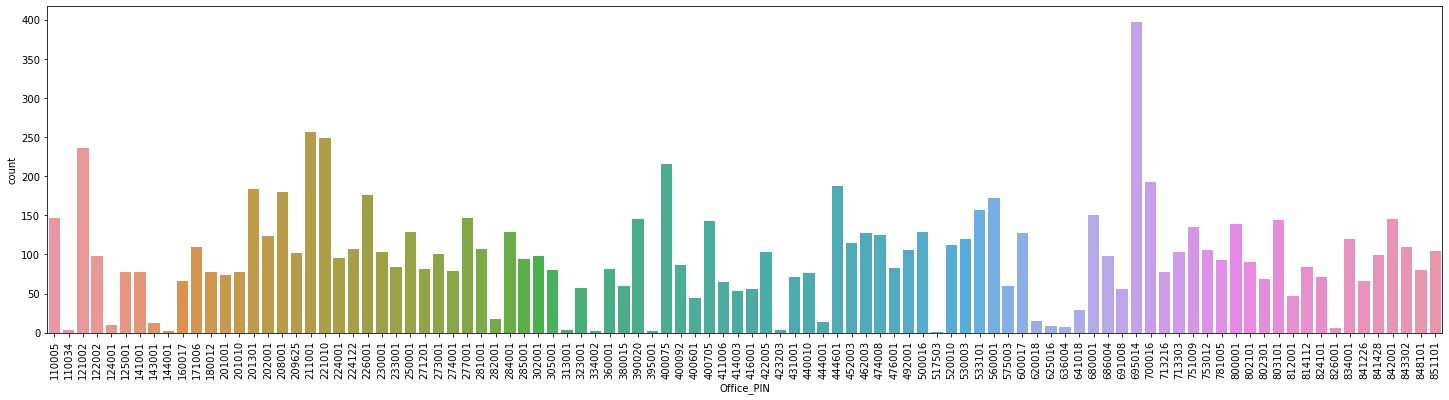

In [19]:
plt.figure(figsize=[25,6])
sns.countplot(x = 'Office_PIN', data=df_train)
plt.xticks(rotation=90)
plt.show()

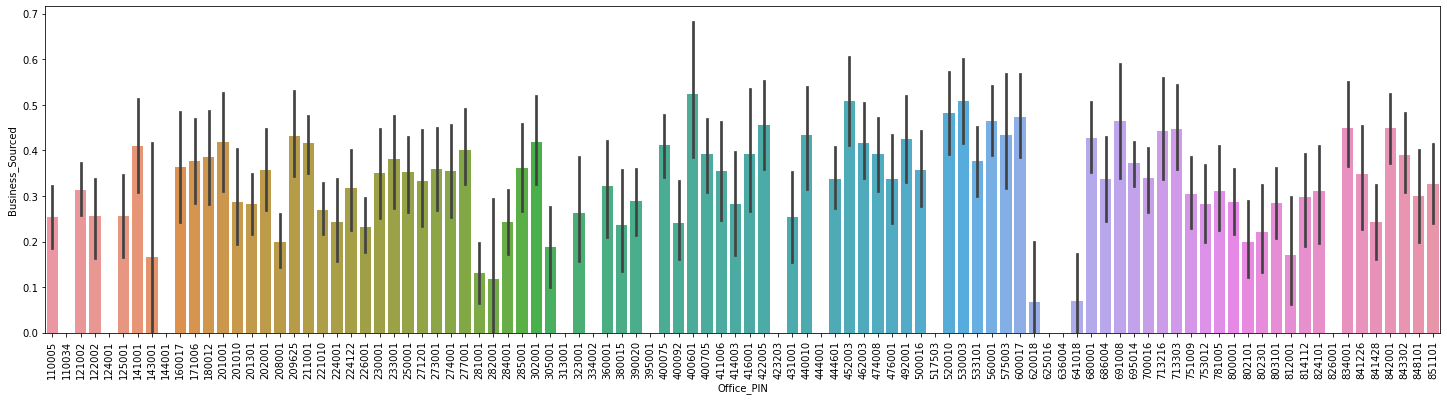

In [20]:
plt.figure(figsize=[25,6])
sns.barplot(y = 'Business_Sourced', x = 'Office_PIN', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Application_Receipt_Date

In [21]:
df_train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,2007-04-16,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,2007-04-16,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,2007-04-16,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,2007-04-16,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,2007-04-16,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0


In [22]:
df_train['Application_Receipt_Date'].describe()

count                    9527
unique                    357
top       2007-05-09 00:00:00
freq                      165
first     2007-04-16 00:00:00
last      2008-07-01 00:00:00
Name: Application_Receipt_Date, dtype: object

In [23]:
from datetime import datetime
current_date=(pd.to_datetime(datetime.today().strftime('%Y-%m-%d')))
current_date

Timestamp('2021-08-13 00:00:00')

In [24]:
df_train['Application_Receipt_Date']=current_date-df_train['Application_Receipt_Date']

In [25]:
df_train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,5233 days,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,5233 days,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,5233 days,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,5233 days,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,5233 days,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0


### Applicant_City_PIN

In [26]:
#missing values
df_train['Applicant_City_PIN'].isnull().sum()/df_train.shape[0]*100

1.0181589167628844

In [27]:
df_train[df_train['Applicant_City_PIN'].isnull()].head(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
278,FIN1000279,110005,5228 days,NaN,NaN,NaT,NaN,NaN,NaN,2005-11-11,Level 2,Level 3,4.0,Confirmation,M,1966-07-06,1.0,0.0,281388.0,13.0,281388.0,13.0,0
595,FIN1000596,636004,5218 days,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
847,FIN1000848,700016,5212 days,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1025,FIN1001026,274001,5210 days,NaN,NaN,NaT,NaN,NaN,NaN,2003-06-02,Level 1,Level 4,6.0,Confirmation,M,1978-05-07,1.0,0.0,251492.0,8.0,251492.0,8.0,0
1169,FIN1001170,700016,5209 days,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
1178,FIN1001179,713216,5209 days,NaN,NaN,NaT,NaN,NaN,NaN,2002-08-30,Level 2,Level 4,6.0,Confirmation,M,1960-07-30,2.0,0.0,285144.0,15.0,285144.0,15.0,0
2056,FIN1002057,802101,5162 days,NaN,NaN,NaT,NaN,NaN,NaN,2003-10-16,Level 1,Level 3,4.0,Confirmation,M,1974-01-08,4.0,1.0,388979.0,29.0,388979.0,29.0,0
2134,FIN1002135,281001,5156 days,NaN,M,1983-06-17,M,Business,Graduate,NaT,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,0
2171,FIN1002172,841226,5154 days,NaN,NaN,NaT,NaN,NaN,NaN,2004-05-01,Level 1,Level 2,3.0,Confirmation,M,1969-07-07,4.0,0.0,76162.0,4.0,76162.0,4.0,0
2898,FIN1002899,851101,5121 days,NaN,M,1984-12-08,M,Business,Class XII,2007-06-11,Level 1,Level 1,2.0,Probation,M,1971-02-07,9.0,1.0,15709.0,1.0,15709.0,1.0,1


In [28]:
# % of people having same office and city pin
df_train[df_train['Applicant_City_PIN']==df_train['Office_PIN']].shape[0]/df_train.shape[0]*100

14.317203736748189

In [29]:
df_train['Applicant_City_PIN'].describe()

count      9430.000000
mean     456784.547296
std      239291.081207
min      110001.000000
25%      226020.000000
50%      422005.500000
75%      695017.000000
max      995657.000000
Name: Applicant_City_PIN, dtype: float64

In [30]:
# If applicant City pin is missing thn we are putting applicants office pin.
df_train.loc[df_train['Applicant_City_PIN'].isnull(),'Applicant_City_PIN'] = df_train.loc[df_train['Applicant_City_PIN'].isnull(),'Office_PIN']

df_test.loc[df_test['Applicant_City_PIN'].isnull(),'Applicant_City_PIN'] = df_test.loc[df_test['Applicant_City_PIN'].isnull(),'Office_PIN']

In [31]:
# # Replacing the missing values by missing keyword
# df_train['Applicant_City_PIN']=df_train['Applicant_City_PIN'].fillna('missing')

# df_test['Applicant_City_PIN']=df_test['Applicant_City_PIN'].fillna('missing')

In [32]:
df_train['Applicant_City_PIN'].isnull().sum(), df_test['Applicant_City_PIN'].isnull().sum()

(0, 0)

### Applicant_Gender

In [33]:
df_train['Applicant_Gender'].value_counts(normalize=True)

M    0.758879
F    0.241121
Name: Applicant_Gender, dtype: float64

In [34]:
df_train['Applicant_Gender'].isnull().sum()

67

In [35]:
df_train['Applicant_Gender'].mode()[0]

'M'

Missing values are very less. So replace it with mode.

In [36]:
df_train['Applicant_Gender']=df_train['Applicant_Gender'].fillna(df_train['Applicant_Gender'].mode()[0])

df_test['Applicant_Gender']=df_test['Applicant_Gender'].fillna(df_test['Applicant_Gender'].mode()[0])

<AxesSubplot:xlabel='Applicant_Gender', ylabel='count'>

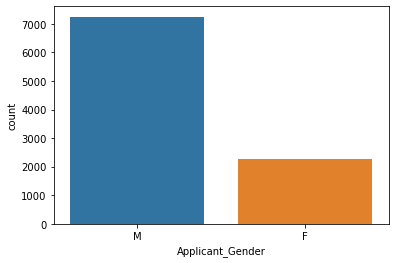

In [37]:
sns.countplot(x = 'Applicant_Gender', data=df_train)

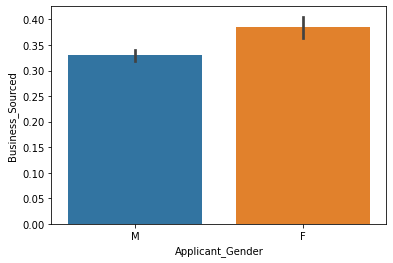

In [38]:
sns.barplot(y = 'Business_Sourced', x = 'Applicant_Gender', data=df_train)
plt.show()

### Applicant_Marital_Status

In [39]:
df_train['Applicant_Marital_Status'].value_counts(normalize=True)

M    0.653374
S    0.345568
W    0.000635
D    0.000423
Name: Applicant_Marital_Status, dtype: float64

In [40]:
df_train['Applicant_Marital_Status'].isnull().sum()/df_train.shape[0]

0.007662433084916553

In [41]:
df_train['Applicant_Marital_Status'].mode()[0]

'M'

In [42]:
df_train[(df_train['Applicant_Marital_Status'].isnull()) & (df_train['Business_Sourced']==0)].shape

(73, 23)

In [43]:
df_train['Applicant_Marital_Status']=df_train['Applicant_Marital_Status'].fillna(df_train['Applicant_Marital_Status'].mode()[0])

df_test['Applicant_Marital_Status']=df_test['Applicant_Marital_Status'].fillna(df_test['Applicant_Marital_Status'].mode()[0])

<AxesSubplot:xlabel='Applicant_Marital_Status', ylabel='count'>

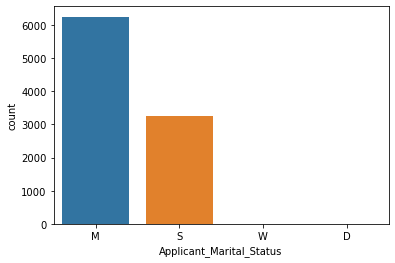

In [44]:
sns.countplot(x = 'Applicant_Marital_Status', data=df_train)

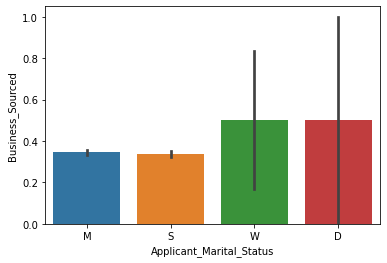

In [45]:
sns.barplot(y = 'Business_Sourced', x = 'Applicant_Marital_Status', data=df_train)
plt.show()

### Applicant_Occupation

In [46]:
df_train['Applicant_Occupation'].value_counts(normalize=True)

Salaried         0.455935
Business         0.277269
Others           0.236696
Self Employed    0.017939
Student          0.012160
Name: Applicant_Occupation, dtype: float64

In [47]:
df_train['Applicant_Occupation'].isnull().sum()/df_train.shape[0]*100

12.816206570798784

In [48]:
df_train['Applicant_Occupation']=df_train['Applicant_Occupation'].fillna('missing')

df_test['Applicant_Occupation']=df_test['Applicant_Occupation'].fillna('missing')

<AxesSubplot:xlabel='Applicant_Occupation', ylabel='count'>

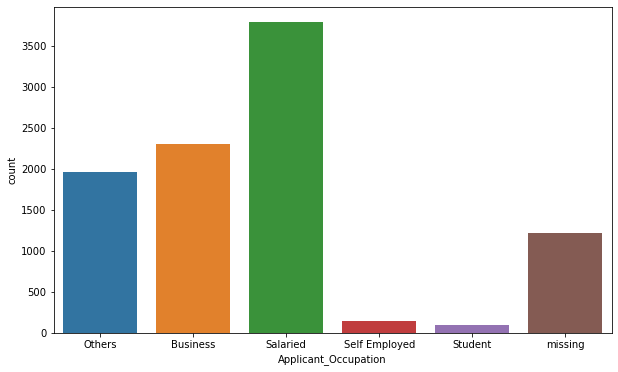

In [49]:
plt.figure(figsize=[10,6])
sns.countplot(x = 'Applicant_Occupation', data=df_train)

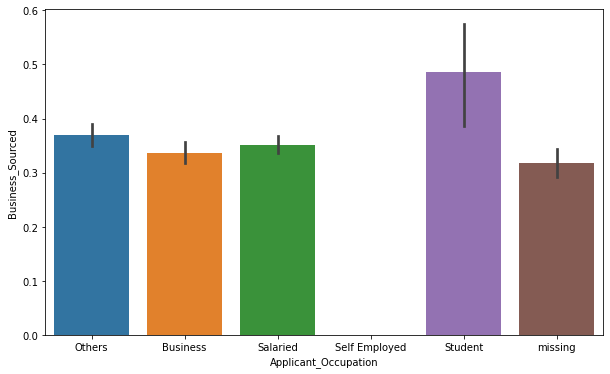

In [50]:
plt.figure(figsize=[10,6])
sns.barplot(y = 'Business_Sourced', x = 'Applicant_Occupation', data=df_train)
plt.show()

### Applicant_Qualification

In [51]:
df_train['Applicant_Qualification'].value_counts(normalize=True)

Class XII                                                           0.614977
Graduate                                                            0.338523
Class X                                                             0.023832
Others                                                              0.013982
Masters of Business Administration                                  0.007838
Associate / Fellow of Institute of Chartered Accountans of India    0.000318
Professional Qualification in Marketing                             0.000106
Associate/Fellow of Acturial Society of India                       0.000106
Associate/Fellow of Insurance Institute of India                    0.000106
Certified Associateship of Indian Institute of Bankers              0.000106
Associate/Fellow of Institute of Company Secretories of India       0.000106
Name: Applicant_Qualification, dtype: float64

In [52]:
df_train['Applicant_Qualification'] = df_train['Applicant_Qualification'].map({
    'Class XII':'Class XII',
    'Graduate':'Graduate',
    'Class X':'Class X',
    'Others':'Others',
    'Masters of Business Administration':'Masters of Business Administration',
    'Associate / Fellow of Institute of Chartered Accountans of India': 'Other Associate / Fellow', 
    'Professional Qualification in Marketing': 'Other Associate / Fellow',
    'Certified Associateship of Indian Institute of Bankers':'Other Associate / Fellow',
    'Associate/Fellow of Acturial Society of India':'Other Associate / Fellow',
    'Associate/Fellow of Insurance Institute of India':'Other Associate / Fellow',
    'Associate/Fellow of Institute of Company Secretories of India':'Other Associate / Fellow'}
    )

In [53]:
df_test['Applicant_Qualification'] = df_test['Applicant_Qualification'].map({
    'Class XII':'Class XII',
    'Graduate':'Graduate',
    'Class X':'Class X',
    'Others':'Others',
    'Masters of Business Administration':'Masters of Business Administration',
    'Associate / Fellow of Institute of Chartered Accountans of India': 'Other Associate / Fellow', 
    'Professional Qualification in Marketing': 'Other Associate / Fellow',
    'Certified Associateship of Indian Institute of Bankers':'Other Associate / Fellow',
    'Associate/Fellow of Acturial Society of India':'Other Associate / Fellow',
    'Associate/Fellow of Insurance Institute of India':'Other Associate / Fellow',
    'Associate/Fellow of Institute of Company Secretories of India':'Other Associate / Fellow'}
    )

In [54]:
df_train['Applicant_Qualification'].value_counts(normalize=True)

Class XII                             0.614977
Graduate                              0.338523
Class X                               0.023832
Others                                0.013982
Masters of Business Administration    0.007838
Other Associate / Fellow              0.000847
Name: Applicant_Qualification, dtype: float64

In [55]:
df_test['Applicant_Qualification'].value_counts(normalize=True)

Graduate                              0.6750
Class XII                             0.2714
Others                                0.0342
Masters of Business Administration    0.0142
Class X                               0.0038
Other Associate / Fellow              0.0014
Name: Applicant_Qualification, dtype: float64

In [56]:
df_train['Applicant_Qualification'].isnull().sum()/df_train.shape[0], df_test['Applicant_Qualification'].isnull().sum()/df_test.shape[0]

(0.009026975963052377, 0.008919722497522299)

In [57]:
df_train['Applicant_Qualification'].mode()

0    Class XII
dtype: object

In [58]:
df_train[(df_train['Applicant_Qualification'].isnull()) & (df_train['Business_Sourced']==0)].shape

(86, 23)

In [59]:
df_train['Applicant_Qualification']=df_train['Applicant_Qualification'].fillna(df_train['Applicant_Qualification'].mode()[0])

df_test['Applicant_Qualification']=df_test['Applicant_Qualification'].fillna(df_test['Applicant_Qualification'].mode()[0])

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Graduate'),
  Text(1, 0, 'Class XII'),
  Text(2, 0, 'Class X'),
  Text(3, 0, 'Masters of Business Administration'),
  Text(4, 0, 'Other Associate / Fellow'),
  Text(5, 0, 'Others')])

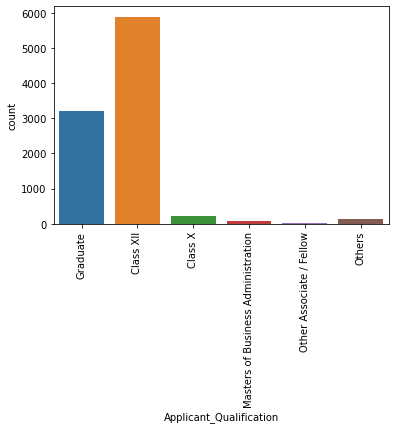

In [60]:
sns.countplot(x = 'Applicant_Qualification', data=df_train)
plt.xticks(rotation=90)

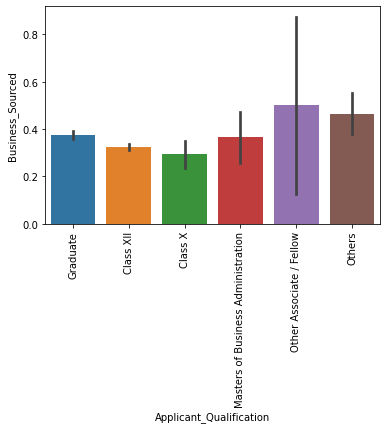

In [61]:
sns.barplot(y = 'Business_Sourced', x = 'Applicant_Qualification', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Manager_Joining_Designation

In [62]:
df_train['Manager_Joining_Designation'].value_counts(normalize=True)

Level 1    0.523745
Level 2    0.315129
Level 3    0.129579
Level 4    0.022614
Other      0.006558
Level 6    0.002035
Level 7    0.000226
Level 5    0.000113
Name: Manager_Joining_Designation, dtype: float64

In [63]:
df_train['Manager_Joining_Designation'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [64]:
df_train[(df_train['Manager_Joining_Designation'].isnull()) & (df_train['Business_Sourced']==0)].shape

(447, 23)

In [65]:
df_train['Manager_Joining_Designation']=df_train['Manager_Joining_Designation'].fillna('Level 0')

df_test['Manager_Joining_Designation']=df_test['Manager_Joining_Designation'].fillna('Level 0')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Level 1'),
  Text(1, 0, 'Level 2'),
  Text(2, 0, 'Level 0'),
  Text(3, 0, 'Other'),
  Text(4, 0, 'Level 3'),
  Text(5, 0, 'Level 7'),
  Text(6, 0, 'Level 5'),
  Text(7, 0, 'Level 4'),
  Text(8, 0, 'Level 6')])

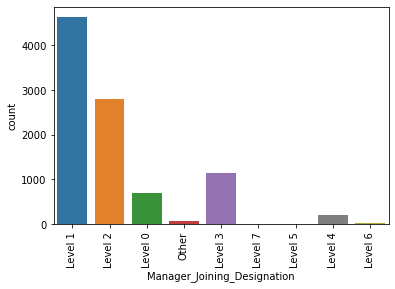

In [66]:
sns.countplot(x = 'Manager_Joining_Designation', data=df_train)
plt.xticks(rotation=90)

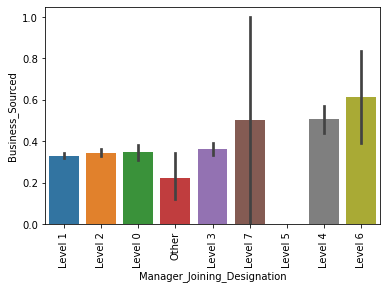

In [67]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Joining_Designation', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Manager_Current_Designation

In [68]:
df_train['Manager_Current_Designation'].value_counts(normalize=True)

Level 2    0.362732
Level 1    0.280303
Level 3    0.229873
Level 4    0.116576
Level 5    0.010516
Name: Manager_Current_Designation, dtype: float64

In [69]:
df_train['Manager_Current_Designation'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [70]:
df_train['Manager_Current_Designation']=df_train['Manager_Current_Designation'].fillna('Level 0')

df_test['Manager_Current_Designation']=df_test['Manager_Current_Designation'].fillna('Level 0')

<AxesSubplot:xlabel='Manager_Current_Designation', ylabel='count'>

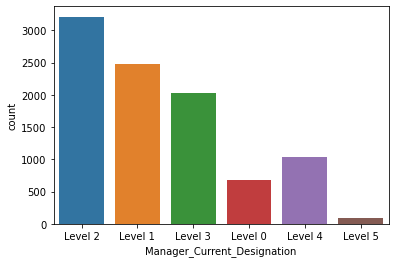

In [71]:
sns.countplot(x = 'Manager_Current_Designation', data=df_train)

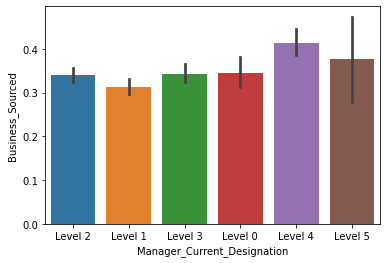

In [72]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Current_Designation', data=df_train)
plt.show()

### Manager_Grade

In [73]:
df_train['Manager_Grade'].value_counts(normalize=True)

3.0     0.362619
2.0     0.279398
4.0     0.230439
5.0     0.075305
6.0     0.045907
7.0     0.002488
8.0     0.001583
1.0     0.000905
9.0     0.000791
10.0    0.000565
Name: Manager_Grade, dtype: float64

In [74]:
df_train['Manager_Grade'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [75]:
df_train['Manager_Grade']=df_train['Manager_Grade'].fillna(0)

df_test['Manager_Grade']=df_test['Manager_Grade'].fillna(0)

<AxesSubplot:xlabel='Manager_Grade', ylabel='count'>

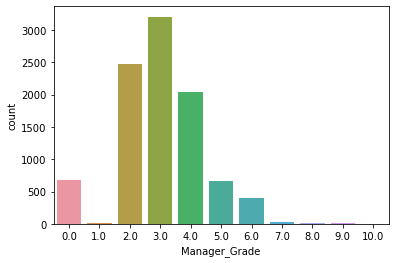

In [76]:
sns.countplot(x = 'Manager_Grade', data=df_train)


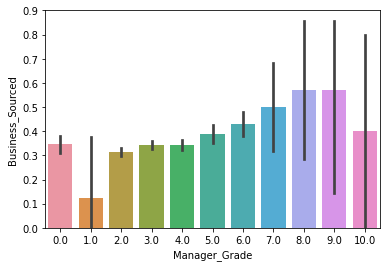

In [77]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Grade', data=df_train)
plt.show()

### Manager_Status

In [78]:
df_train['Manager_Status'].value_counts(normalize=True)

Confirmation    0.596676
Probation       0.403324
Name: Manager_Status, dtype: float64

In [79]:
df_train['Manager_Status'].isnull().sum()/df_train.shape[0], df_test['Manager_Status'].isnull().sum()/df_test.shape[0]

(0.07169098352052063, 0.16333002973240832)

In [80]:
df_train['Manager_Status'].mode()

0    Confirmation
dtype: object

In [81]:
df_train['Manager_Status']=df_train['Manager_Status'].fillna('missing')

df_test['Manager_Status']=df_test['Manager_Status'].fillna('missing')

<AxesSubplot:xlabel='Manager_Status', ylabel='count'>

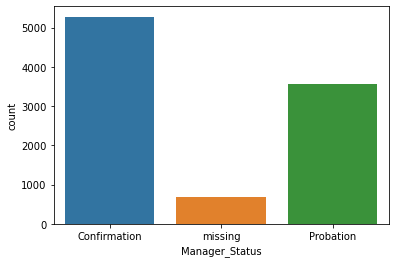

In [82]:
sns.countplot(x = 'Manager_Status', data=df_train)

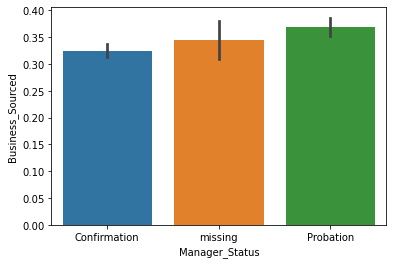

In [83]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Status', data=df_train)
plt.show()

### Manager_Gender

In [84]:
df_train['Manager_Gender'].value_counts(normalize=True)

M    0.862393
F    0.137607
Name: Manager_Gender, dtype: float64

In [85]:
df_train['Manager_Gender'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [86]:
df_train['Manager_Gender'].mode()[0]

'M'

In [87]:
df_train['Manager_Gender']=df_train['Manager_Gender'].fillna(df_train['Manager_Gender'].mode()[0])

df_test['Manager_Gender']=df_test['Manager_Gender'].fillna(df_test['Manager_Gender'].mode()[0])

<AxesSubplot:xlabel='Manager_Gender', ylabel='count'>

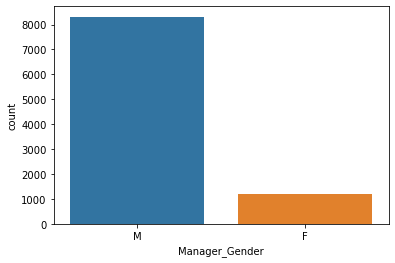

In [88]:
sns.countplot(x = 'Manager_Gender', data=df_train)

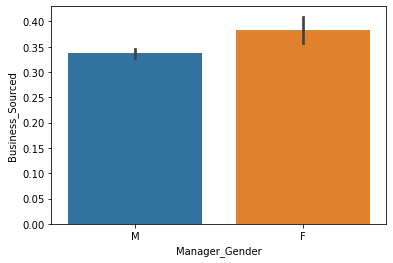

In [89]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Gender', data=df_train)
plt.show()

### Manager_Num_Application

In [90]:
df_train['Manager_Num_Application'].value_counts(normalize=True)

0.0     0.336952
1.0     0.189620
2.0     0.151402
3.0     0.121325
4.0     0.080280
5.0     0.051787
6.0     0.030529
7.0     0.014925
8.0     0.009498
9.0     0.007123
10.0    0.003053
11.0    0.001583
16.0    0.000678
12.0    0.000565
13.0    0.000452
14.0    0.000113
22.0    0.000113
Name: Manager_Num_Application, dtype: float64

In [91]:
df_train['Manager_Num_Application'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [92]:
df_train['Manager_Num_Application']=df_train['Manager_Num_Application'].fillna(0)

df_test['Manager_Num_Application']=df_test['Manager_Num_Application'].fillna(0)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '16.0'),
  Text(16, 0, '22.0')])

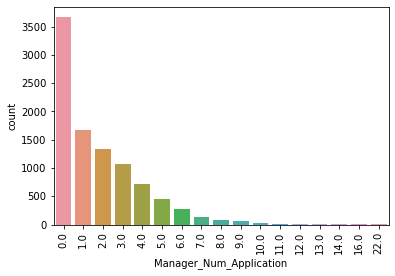

In [93]:
sns.countplot(x = 'Manager_Num_Application', data=df_train)
plt.xticks(rotation=90)

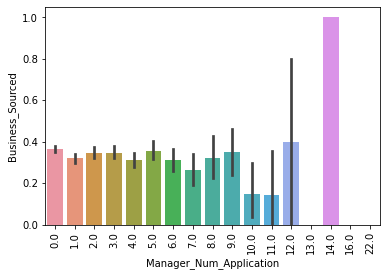

In [94]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Num_Application', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Manager_Num_Coded

In [95]:
df_train['Manager_Num_Coded'].value_counts(normalize=True)

0.0    0.597354
1.0    0.203415
2.0    0.105834
3.0    0.053256
4.0    0.025441
5.0    0.009385
6.0    0.003392
7.0    0.000791
8.0    0.000678
9.0    0.000452
Name: Manager_Num_Coded, dtype: float64

In [96]:
df_train['Manager_Num_Coded'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [97]:
df_train['Manager_Num_Coded']=df_train['Manager_Num_Coded'].fillna(0)

df_test['Manager_Num_Coded']=df_test['Manager_Num_Coded'].fillna(0)

<AxesSubplot:xlabel='Manager_Num_Coded', ylabel='count'>

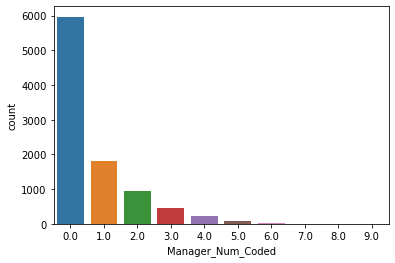

In [98]:
sns.countplot(x = 'Manager_Num_Coded', data=df_train)

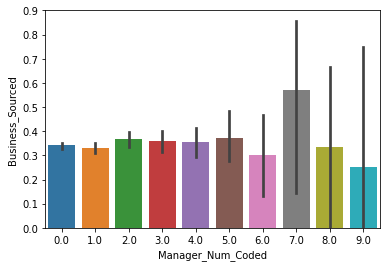

In [99]:
sns.barplot(y = 'Business_Sourced', x = 'Manager_Num_Coded', data=df_train)
plt.show()

### Manager_Num_Products

In [100]:
df_train['Manager_Num_Products'].value_counts(normalize=True)

0.0      0.328924
6.0      0.048847
5.0      0.048168
4.0      0.045002
7.0      0.043419
8.0      0.040592
9.0      0.037427
3.0      0.035391
11.0     0.035052
1.0      0.033017
2.0      0.032564
10.0     0.031999
12.0     0.028833
13.0     0.025893
14.0     0.024197
15.0     0.021710
17.0     0.018996
18.0     0.015491
16.0     0.015152
19.0     0.011872
20.0     0.009272
21.0     0.008480
23.0     0.008254
22.0     0.005880
24.0     0.005767
25.0     0.005201
26.0     0.003505
27.0     0.003505
29.0     0.003166
28.0     0.002940
32.0     0.002488
30.0     0.002488
33.0     0.001809
35.0     0.001696
31.0     0.001357
34.0     0.001244
37.0     0.001131
41.0     0.001018
36.0     0.000905
42.0     0.000791
38.0     0.000791
39.0     0.000791
40.0     0.000565
51.0     0.000565
60.0     0.000565
43.0     0.000452
66.0     0.000452
47.0     0.000452
44.0     0.000339
46.0     0.000339
45.0     0.000226
101.0    0.000226
74.0     0.000226
53.0     0.000226
48.0     0.000113
59.0     0

In [101]:
df_train['Manager_Num_Products']=df_train['Manager_Num_Products'].fillna(0)

df_test['Manager_Num_Products']=df_test['Manager_Num_Products'].fillna(0)

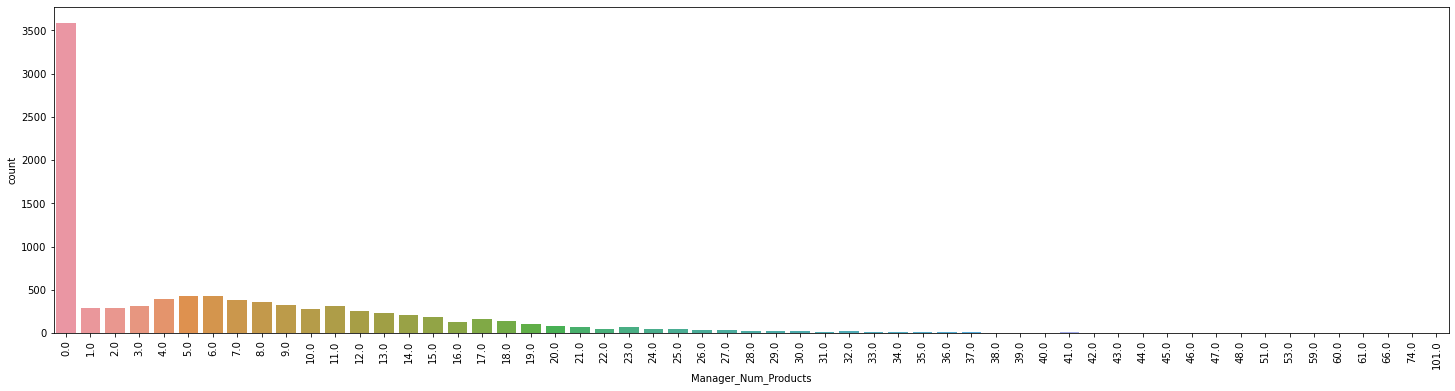

In [102]:
plt.figure(figsize=[25,6])
sns.countplot(x = 'Manager_Num_Products', data=df_train)
plt.xticks(rotation=90)
plt.show()

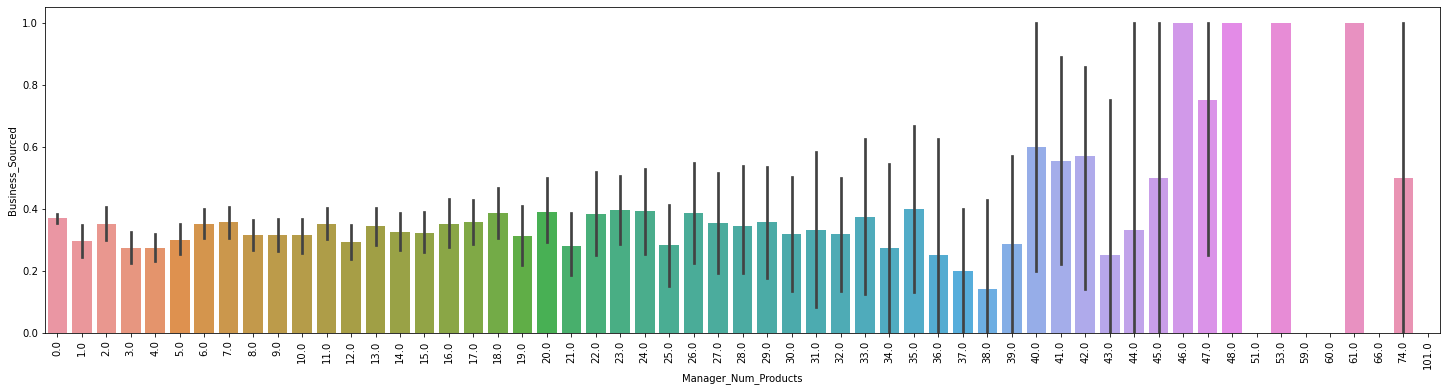

In [103]:
plt.figure(figsize=[25,6])
sns.barplot(y = 'Business_Sourced', x = 'Manager_Num_Products', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Manager_Num_Products2

In [104]:
df_train['Manager_Num_Products2'].value_counts(normalize=True)

0.0      0.329489
6.0      0.049186
5.0      0.047942
4.0      0.045794
7.0      0.043532
8.0      0.040140
9.0      0.037427
3.0      0.035504
11.0     0.035165
1.0      0.032791
2.0      0.032451
10.0     0.031886
12.0     0.028833
13.0     0.025667
14.0     0.024197
15.0     0.021936
17.0     0.018996
18.0     0.015152
16.0     0.015038
19.0     0.011646
20.0     0.009611
21.0     0.008593
23.0     0.008141
22.0     0.006106
24.0     0.005880
25.0     0.005088
26.0     0.003618
27.0     0.003166
29.0     0.002827
28.0     0.002827
30.0     0.002488
32.0     0.002488
33.0     0.001809
35.0     0.001696
31.0     0.001357
37.0     0.001131
34.0     0.001018
36.0     0.000905
39.0     0.000905
41.0     0.000791
42.0     0.000791
38.0     0.000791
43.0     0.000565
40.0     0.000565
51.0     0.000565
60.0     0.000565
66.0     0.000452
44.0     0.000452
47.0     0.000452
46.0     0.000339
45.0     0.000226
101.0    0.000226
74.0     0.000226
53.0     0.000226
48.0     0.000113
59.0     0

In [105]:
df_train['Manager_Num_Products2']=df_train['Manager_Num_Products2'].fillna(0)

df_test['Manager_Num_Products2']=df_test['Manager_Num_Products2'].fillna(0)

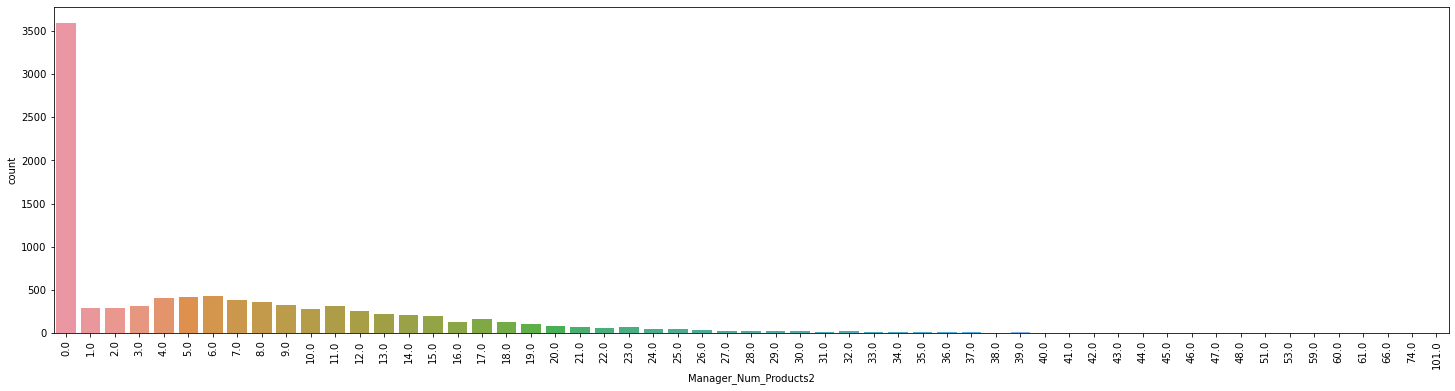

In [106]:
plt.figure(figsize=[25,6])
sns.countplot(x = 'Manager_Num_Products2', data=df_train)
plt.xticks(rotation=90)
plt.show()

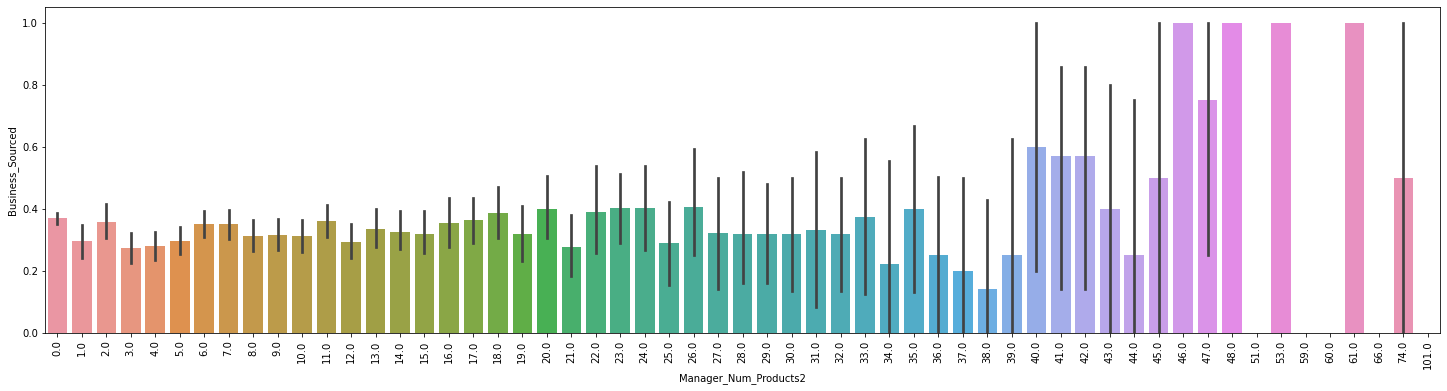

In [107]:
plt.figure(figsize=[25,6])
sns.barplot(y = 'Business_Sourced', x = 'Manager_Num_Products2', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Business_Sourced

In [108]:
df_train['Business_Sourced'].value_counts(normalize=True)

0    0.65708
1    0.34292
Name: Business_Sourced, dtype: float64

In [109]:
df_train['Business_Sourced'].isnull().sum()

0

<AxesSubplot:xlabel='Business_Sourced', ylabel='count'>

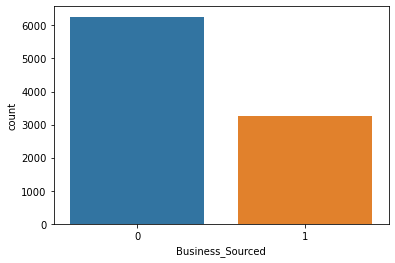

In [110]:
sns.countplot(x = 'Business_Sourced', data=df_train)

<AxesSubplot:xlabel='Business_Sourced', ylabel='Density'>

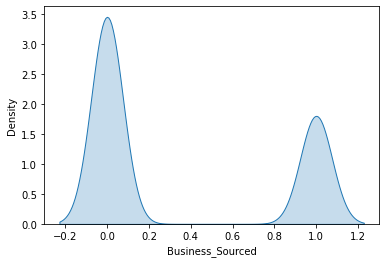

In [111]:
sns.kdeplot(x= 'Business_Sourced', data = df_train, shade = True)

## Feature Engineering

In [112]:
# Calculating the age of the applicant and manager as on Receipt Date and DOJ respectivity


from datetime import datetime, date

current_date=pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
df_train['Applicant_age'] = (current_date - df_train['Applicant_BirthDate']).astype('<m8[Y]')
df_test['Applicant_age'] = (current_date - df_test['Applicant_BirthDate']).astype('<m8[Y]')

df_train['Manager_age'] = (current_date - df_train['Manager_DoB']).astype('<m8[Y]')
df_test['Manager_age'] = (current_date - df_test['Manager_DoB']).astype('<m8[Y]')

In [113]:
df_train['Manager_Experience'] = (current_date - df_train['Manager_DOJ']).astype('<m8[Y]')
df_test['Manager_Experience'] = (current_date - df_test['Manager_DOJ']).astype('<m8[Y]')

In [114]:
df_train['Applicant_age'] = pd.cut(df_train['Applicant_age'],[10,30,40,50,60,70,80,90,100,130],
       labels=['less thn 30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','greater thn 100'])
df_test['Applicant_age'] = pd.cut(df_test['Applicant_age'],[10,30,40,50,60,70,80,90,100,130],
       labels=['less thn 30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','greater thn 100'])

df_train['Manager_age'] = pd.cut(df_train['Manager_age'],[10,30,40,50,60,70,80,90,100,130],
       labels=['less thn 30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','greater thn 100'])
df_test['Manager_age'] = pd.cut(df_test['Manager_age'],[10,30,40,50,60,70,80,90,100,130],
       labels=['less thn 30','30-40','40-50','50-60','60-70','70-80','80-90','90-100','greater thn 100'])

In [115]:
#Creating variable for applications per day

GroupByApplication =  df_train.groupby('Application_Receipt_Date')
df_train['ApplicationPerDay'] = (GroupByApplication['ID'].cumcount()+1)



GroupByApplication =  df_test.groupby('Application_Receipt_Date')
df_test['ApplicationPerDay'] = (GroupByApplication['ID'].cumcount()+1)

In [116]:
df_train.head(10)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced,Applicant_age,Manager_age,Manager_Experience,ApplicationPerDay
0,FIN1000001,842001,5233 days,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,0,40-50,40-50,15.0,1
1,FIN1000002,842001,5233 days,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,Level 1,Level 2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,28.0,335249.0,28.0,1,30-40,40-50,15.0,2
2,FIN1000003,800001,5233 days,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,Level 1,Level 1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,24.0,357184.0,24.0,0,50-60,50-60,15.0,3
3,FIN1000004,814112,5233 days,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,Level 1,Level 3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,22.0,318356.0,22.0,0,30-40,40-50,17.0,4
4,FIN1000005,814112,5233 days,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,Level 1,Level 1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,17.0,230402.0,17.0,0,30-40,40-50,15.0,5
5,FIN1000006,814112,5233 days,814114.0,M,1988-03-23,S,Others,Class XII,2006-01-17,Level 1,Level 1,2.0,Confirmation,M,1979-02-20,0.0,0.0,247118.0,24.0,247118.0,24.0,1,30-40,40-50,15.0,6
6,FIN1000007,842001,5233 days,844118.0,M,1969-02-05,M,Business,Class XII,2003-09-01,Level 1,Level 1,2.0,Confirmation,M,1969-05-28,0.0,0.0,315119.0,27.0,315119.0,27.0,1,50-60,50-60,17.0,7
7,FIN1000008,800001,5233 days,844103.0,M,1984-01-28,M,Salaried,Class XII,2006-12-16,Level 1,Level 1,2.0,Confirmation,M,1976-01-07,5.0,4.0,117358.0,9.0,117358.0,9.0,0,30-40,40-50,14.0,8
8,FIN1000009,209625,5233 days,206451.0,M,1976-01-08,M,Business,Graduate,2004-11-18,Level 1,Level 2,3.0,Confirmation,M,1966-03-07,0.0,0.0,244028.0,17.0,244028.0,17.0,1,40-50,50-60,16.0,9
9,FIN1000010,211001,5233 days,212218.0,M,1982-02-03,M,Others,Class XII,2002-08-15,Level 1,Level 3,4.0,Confirmation,M,1974-11-14,0.0,0.0,851557.0,39.0,851557.0,39.0,1,30-40,40-50,18.0,10


In [117]:
df_train['Manager_Current_Designation'] = df_train['Manager_Current_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='missing' else int(x.split(' ')[-1]))
df_test['Manager_Current_Designation'] = df_test['Manager_Current_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='missing' else int(x.split(' ')[-1]))

df_train['Manager_Joining_Designation'] = df_train['Manager_Joining_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='missing' else int(x.split(' ')[-1]))
df_test['Manager_Joining_Designation'] = df_test['Manager_Joining_Designation'].apply(lambda x: 0 if x=='Other' else -1 if x=='missing' else int(x.split(' ')[-1]))

In [118]:
df_train['Promotion_Status'] = (df_train['Manager_Current_Designation'] - df_train['Manager_Joining_Designation']).apply(lambda x : 'promoted' if x>0 else 'demoted' if x<0 else 'same' )
df_train.loc[df_train['Manager_Current_Designation'] ==-1,'Promotion_Status'] = 'missing'

df_test['Promotion_Status'] = (df_test['Manager_Current_Designation'] - df_test['Manager_Joining_Designation']).apply(lambda x : 'promoted' if x>0 else 'demoted' if x<0 else 'same' )
df_test.loc[df_test['Manager_Current_Designation'] ==-1,'Promotion_Status'] = 'missing'

In [119]:
df_train['Manager_Num_Products']=df_train['Manager_Num_Products']+df_train['Manager_Num_Products2']
df_test['Manager_Num_Products']=df_test['Manager_Num_Products']+df_test['Manager_Num_Products2']

df_train.drop('Manager_Num_Products2',axis=1,inplace=True)
df_test.drop('Manager_Num_Products2',axis=1,inplace=True)

In [120]:
df_train['Manager_Current_Designation'].value_counts()

2    3208
1    2479
3    2033
4    1031
0     683
5      93
Name: Manager_Current_Designation, dtype: int64

In [121]:
df_train.head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Business_Sourced,Applicant_age,Manager_age,Manager_Experience,ApplicationPerDay,Promotion_Status
0,FIN1000001,842001,5233 days,844120.0,M,1971-12-19,M,Others,Graduate,2005-11-10,1,2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,56.0,335249.0,0,40-50,40-50,15.0,1,promoted
1,FIN1000002,842001,5233 days,844111.0,M,1983-02-17,S,Others,Class XII,2005-11-10,1,2,3.0,Confirmation,M,1978-02-17,2.0,1.0,335249.0,56.0,335249.0,1,30-40,40-50,15.0,2,promoted
2,FIN1000003,800001,5233 days,844101.0,M,1966-01-16,M,Business,Class XII,2006-05-27,1,1,2.0,Confirmation,M,1969-03-03,0.0,0.0,357184.0,48.0,357184.0,0,50-60,50-60,15.0,3,same
3,FIN1000004,814112,5233 days,814112.0,M,1988-02-03,S,Salaried,Class XII,2003-08-21,1,3,4.0,Confirmation,F,1978-08-14,0.0,0.0,318356.0,44.0,318356.0,0,30-40,40-50,17.0,4,promoted
4,FIN1000005,814112,5233 days,815351.0,M,1985-07-04,M,Others,Class XII,2006-05-08,1,1,2.0,Confirmation,M,1971-02-07,2.0,1.0,230402.0,34.0,230402.0,0,30-40,40-50,15.0,5,same


In [122]:
df_train[(df_train['Manager_Business']!=df_train['Manager_Business2']) & (~df_train['Manager_Business'].isnull())].head()

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Business_Sourced,Applicant_age,Manager_age,Manager_Experience,ApplicationPerDay,Promotion_Status
7380,FIN1007381,400705,4909 days,400709.0,M,1978-01-09,M,Business,Class XII,2001-07-17,2,4,6.0,Confirmation,M,1971-04-23,3.0,2.0,1126693.0,44.0,568739.0,0,40-50,40-50,20.0,17,promoted
7455,FIN1007456,380015,4901 days,380013.0,M,1981-04-06,M,Salaried,Class XII,2008-02-18,3,3,4.0,Probation,F,1979-03-02,0.0,0.0,750000.0,2.0,0.0,0,30-40,40-50,13.0,2,same
7456,FIN1007457,380015,4901 days,380014.0,M,1978-02-02,S,Salaried,Graduate,2008-02-18,3,3,4.0,Probation,F,1979-03-02,0.0,0.0,750000.0,2.0,0.0,0,40-50,40-50,13.0,3,same
7533,FIN1007534,444601,4869 days,444107.0,F,1950-01-05,M,Salaried,Others,2002-11-11,2,2,3.0,Confirmation,F,1963-07-17,1.0,0.0,851693.0,47.0,551920.0,1,70-80,50-60,18.0,5,same
7607,FIN1007608,273001,4867 days,273163.0,M,1981-04-05,S,Others,Graduate,2006-10-05,1,2,3.0,Confirmation,M,1969-08-27,0.0,0.0,757479.0,54.0,707408.0,1,30-40,50-60,14.0,9,promoted


In [123]:
df_train['Manager_Business'].isnull().sum()

683

In [124]:
checknullvalues(df_train)

ID                             0.000000
Office_PIN                     0.000000
Application_Receipt_Date       0.000000
Applicant_City_PIN             0.000000
Applicant_Gender               0.000000
Applicant_BirthDate            0.766243
Applicant_Marital_Status       0.000000
Applicant_Occupation           0.000000
Applicant_Qualification        0.000000
Manager_DOJ                    7.169098
Manager_Joining_Designation    0.000000
Manager_Current_Designation    0.000000
Manager_Grade                  0.000000
Manager_Status                 0.000000
Manager_Gender                 0.000000
Manager_DoB                    7.169098
Manager_Num_Application        0.000000
Manager_Num_Coded              0.000000
Manager_Business               7.169098
Manager_Num_Products           0.000000
Manager_Business2              7.169098
Business_Sourced               0.000000
Applicant_age                  0.766243
Manager_age                    7.169098
Manager_Experience             7.169098


### Applicant_age

In [125]:
df_train['Applicant_age'].value_counts(normalize=True)

40-50              0.369579
30-40              0.365136
50-60              0.173366
60-70              0.051301
70-80              0.035012
80-90              0.005395
90-100             0.000106
less thn 30        0.000106
greater thn 100    0.000000
Name: Applicant_age, dtype: float64

In [126]:
df_train['Applicant_age'].isnull().sum()/df_train.shape[0]

0.007662433084916553

In [127]:
df_train['Applicant_age'].mode()[0]

'40-50'

In [128]:
#df_train['Applicant_age'] = df_train['Applicant_age'].cat.add_categories(df_train['Applicant_age'].mode()[0])
df_train['Applicant_age'].fillna(df_train['Applicant_age'].mode()[0], inplace =True) 

In [129]:
#df_test['Applicant_age'] = df_test['Applicant_age'].cat.add_categories(df_test['Applicant_age'].mode()[0])
df_test['Applicant_age'].fillna(df_test['Applicant_age'].mode()[0], inplace =True)

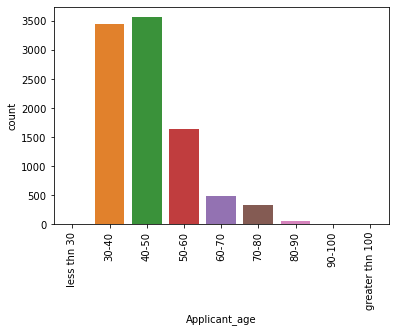

In [130]:
sns.countplot(x = 'Applicant_age', data=df_train)
plt.xticks(rotation=90)
plt.show()

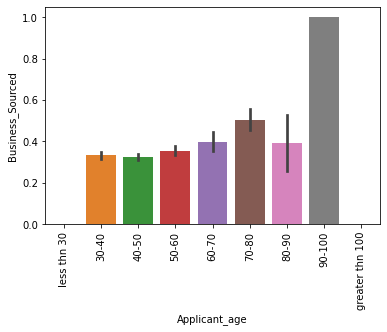

In [131]:
#plt.figure(figsize=[25,6])
sns.barplot(y = 'Business_Sourced', x = 'Applicant_age', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Manager_age

In [132]:
df_train['Manager_age'].value_counts(normalize=True)

40-50              0.580959
50-60              0.273858
30-40              0.108887
60-70              0.035730
70-80              0.000565
greater thn 100    0.000000
90-100             0.000000
80-90              0.000000
less thn 30        0.000000
Name: Manager_age, dtype: float64

In [133]:
df_train['Manager_age'].isnull().sum()/df_train.shape[0]

0.07169098352052063

In [134]:
df_train['Manager_age'].mode()

0    40-50
Name: Manager_age, dtype: category
Categories (9, object): ['less thn 30' < '30-40' < '40-50' < '50-60' ... '70-80' < '80-90' < '90-100' < 'greater thn 100']

In [135]:
#df_train['Manager_age'] = df_train['Manager_age'].cat.add_categories('missing')
df_train['Manager_age'].fillna(df_train['Manager_age'].mode()[0], inplace =True) 

#df_test['Manager_age'] = df_test['Manager_age'].cat.add_categories('missing')
df_test['Manager_age'].fillna(df_test['Manager_age'].mode()[0], inplace =True)

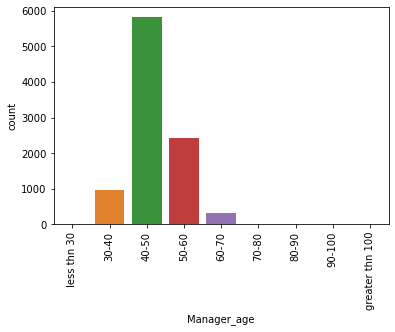

In [136]:
sns.countplot(x = 'Manager_age', data=df_train)
plt.xticks(rotation=90)
plt.show()

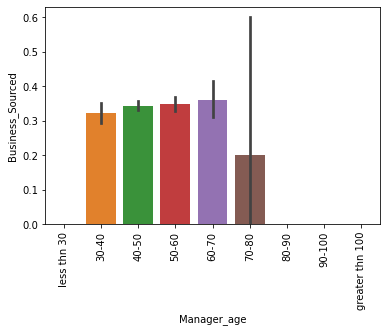

In [137]:
#plt.figure(figsize=[25,6])
sns.barplot(y = 'Business_Sourced', x = 'Manager_age', data=df_train)
plt.xticks(rotation=90)
plt.show()

### Manager_Business

In [138]:
df_train['Manager_Business'].value_counts(normalize=True)

 0.0         0.328358
 20000.0     0.003844
 50000.0     0.002148
 25000.0     0.001583
 30000.0     0.001131
               ...   
 379900.0    0.000113
 291481.0    0.000113
 137546.0    0.000113
 186697.0    0.000113
-28419.0     0.000113
Name: Manager_Business, Length: 3747, dtype: float64

In [139]:
df_train['Manager_Business'].isnull().sum()

683

In [140]:
df_train['Manager_Business']=df_train['Manager_Business'].fillna(0)

df_test['Manager_Business']=df_test['Manager_Business'].fillna(0)

In [141]:
df_train['Manager_Business'].isnull().sum()

0

### Manager_Business2

In [142]:
df_train['Manager_Business2'].value_counts(normalize=True)

0.0          0.328924
20000.0      0.003844
50000.0      0.002148
25000.0      0.001583
30000.0      0.001131
               ...   
93352.0      0.000113
1854078.0    0.000113
379900.0     0.000113
291481.0     0.000113
66542.0      0.000113
Name: Manager_Business2, Length: 3743, dtype: float64

In [143]:
df_train['Manager_Business2'].isnull().sum()

683

In [144]:
df_train['Manager_Business2']=df_train['Manager_Business2'].fillna(0)

df_test['Manager_Business2']=df_test['Manager_Business2'].fillna(0)

In [145]:
df_train['Manager_Business2'].isnull().sum()

0

In [146]:
df_train['Manager_Business']=df_train['Manager_Business']+df_train['Manager_Business2']
df_test['Manager_Business']=df_test['Manager_Business']+df_test['Manager_Business2']

df_train.drop('Manager_Business2',axis=1,inplace=True)
df_test.drop('Manager_Business2',axis=1,inplace=True)

### Manager_Experience

In [147]:
df_train['Manager_Experience'].value_counts(normalize=True)

13.0    0.306083
14.0    0.242650
15.0    0.196970
17.0    0.103008
18.0    0.067730
16.0    0.040253
19.0    0.033356
20.0    0.009950
Name: Manager_Experience, dtype: float64

In [148]:
df_train['Manager_Experience'].isnull().sum()/df_train.shape[0]*100

7.169098352052063

In [149]:
df_train['Manager_Experience'].describe()

count    8844.000000
mean       14.777815
std         1.806180
min        13.000000
25%        13.000000
50%        14.000000
75%        16.000000
max        20.000000
Name: Manager_Experience, dtype: float64

In [150]:
df_train['Manager_Experience'].mode()[0]

13.0

In [151]:
# giving some random same value
df_train['Manager_Experience']=df_train['Manager_Experience'].fillna(df_train['Manager_Experience'].mode()[0])

df_test['Manager_Experience']=df_test['Manager_Experience'].fillna(df_test['Manager_Experience'].mode()[0])

# df_train['Manager_DOJ']=df_train['Manager_DOJ'].fillna('missing')

# df_test['Manager_DOJ']=df_test['Manager_DOJ'].fillna('missing')


In [152]:
df_train['Manager_Experience'].isnull().sum()

0

In [153]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   ID                           9527 non-null   object         
 1   Office_PIN                   9527 non-null   int64          
 2   Application_Receipt_Date     9527 non-null   timedelta64[ns]
 3   Applicant_City_PIN           9527 non-null   float64        
 4   Applicant_Gender             9527 non-null   object         
 5   Applicant_BirthDate          9454 non-null   datetime64[ns] 
 6   Applicant_Marital_Status     9527 non-null   object         
 7   Applicant_Occupation         9527 non-null   object         
 8   Applicant_Qualification      9527 non-null   object         
 9   Manager_DOJ                  8844 non-null   datetime64[ns] 
 10  Manager_Joining_Designation  9527 non-null   int64          
 11  Manager_Current_Designation  9

In [154]:
# Dropping Applicant_BirthDate, Manager_DoB
df_train.drop(['Applicant_BirthDate','Manager_DoB','Manager_DOJ'],axis=1,inplace=True)
df_test.drop(['Applicant_BirthDate','Manager_DoB','Manager_DOJ'],axis=1,inplace=True)

In [155]:
checknullvalues(df_train)

ID                             0.0
Office_PIN                     0.0
Application_Receipt_Date       0.0
Applicant_City_PIN             0.0
Applicant_Gender               0.0
Applicant_Marital_Status       0.0
Applicant_Occupation           0.0
Applicant_Qualification        0.0
Manager_Joining_Designation    0.0
Manager_Current_Designation    0.0
Manager_Grade                  0.0
Manager_Status                 0.0
Manager_Gender                 0.0
Manager_Num_Application        0.0
Manager_Num_Coded              0.0
Manager_Business               0.0
Manager_Num_Products           0.0
Business_Sourced               0.0
Applicant_age                  0.0
Manager_age                    0.0
Manager_Experience             0.0
ApplicationPerDay              0.0
Promotion_Status               0.0
dtype: float64

In [156]:
df_train.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Business_Sourced',
       'Applicant_age', 'Manager_age', 'Manager_Experience',
       'ApplicationPerDay', 'Promotion_Status'],
      dtype='object')

In [157]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype          
---  ------                       --------------  -----          
 0   ID                           9527 non-null   object         
 1   Office_PIN                   9527 non-null   int64          
 2   Application_Receipt_Date     9527 non-null   timedelta64[ns]
 3   Applicant_City_PIN           9527 non-null   float64        
 4   Applicant_Gender             9527 non-null   object         
 5   Applicant_Marital_Status     9527 non-null   object         
 6   Applicant_Occupation         9527 non-null   object         
 7   Applicant_Qualification      9527 non-null   object         
 8   Manager_Joining_Designation  9527 non-null   int64          
 9   Manager_Current_Designation  9527 non-null   int64          
 10  Manager_Grade                9527 non-null   float64        
 11  Manager_Status               9

### ApplicationPerDay

In [158]:
df_train['ApplicationPerDay'].value_counts(normalize=True)

1      0.037472
2      0.037263
3      0.036423
4      0.035793
6      0.035373
5      0.035373
7      0.035163
8      0.034638
9      0.033379
10     0.032539
11     0.031489
12     0.030965
13     0.030125
14     0.028865
15     0.027501
16     0.026451
17     0.025611
18     0.024352
19     0.023617
20     0.023092
21     0.021728
22     0.021413
23     0.020258
24     0.019314
25     0.017634
26     0.016165
27     0.015115
28     0.014275
29     0.013960
30     0.013540
31     0.012596
32     0.011546
33     0.010916
34     0.010706
35     0.009867
36     0.008922
37     0.008397
38     0.007977
39     0.007662
40     0.007348
41     0.006508
42     0.005983
43     0.005353
44     0.005038
45     0.004723
46     0.004513
47     0.003779
48     0.003464
50     0.002939
49     0.002939
51     0.002834
52     0.002834
53     0.002729
54     0.002729
55     0.002519
56     0.002414
57     0.002099
58     0.001889
59     0.001784
60     0.001679
63     0.001574
62     0.001574
61     0

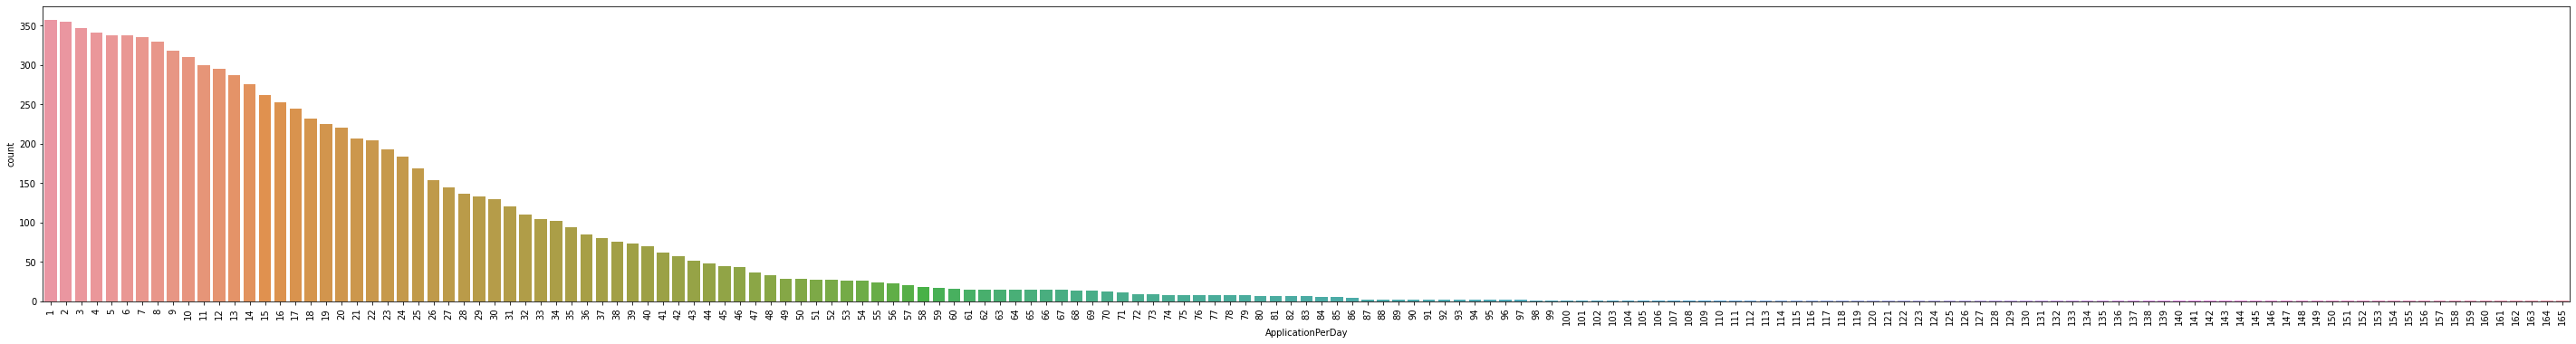

In [159]:
plt.figure(figsize=[50,6])
sns.countplot(x = 'ApplicationPerDay', data=df_train)
plt.xticks(rotation=90)
plt.show()

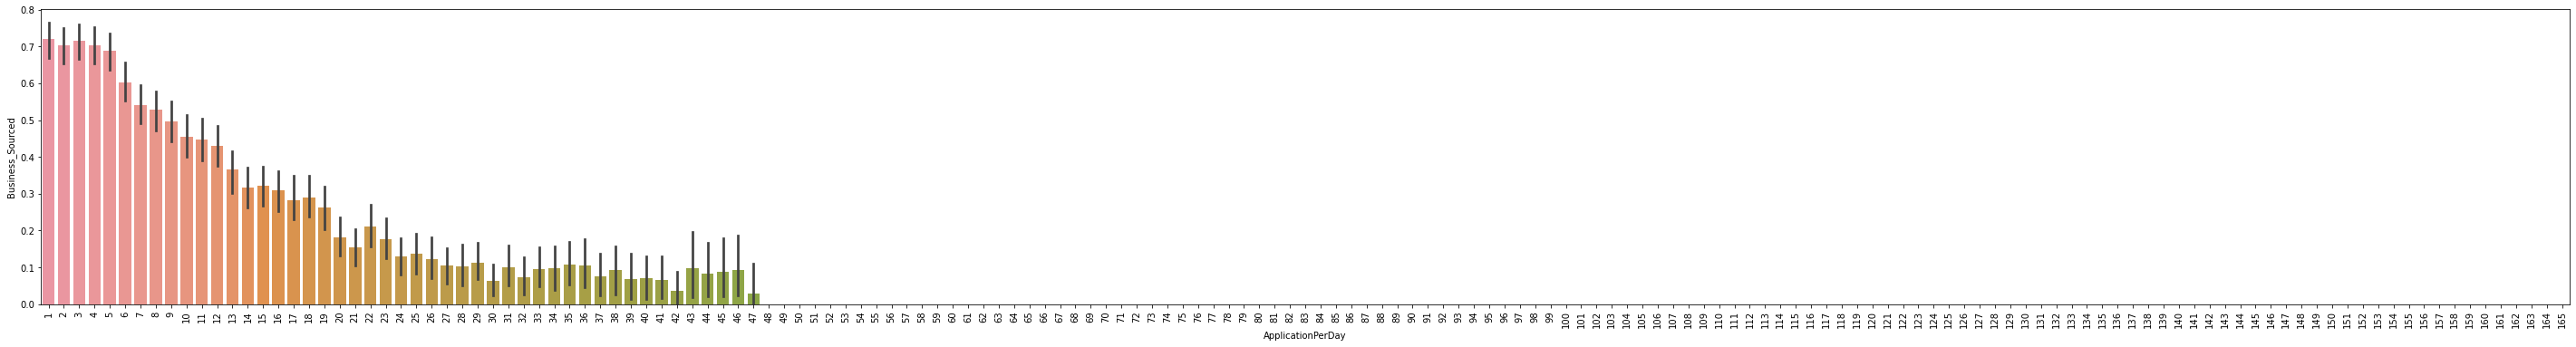

In [160]:
plt.figure(figsize=[50,6])
sns.barplot(y = 'Business_Sourced', x = 'ApplicationPerDay', data=df_train)
plt.xticks(rotation=90)
plt.show()

## Heatmap

<AxesSubplot:>

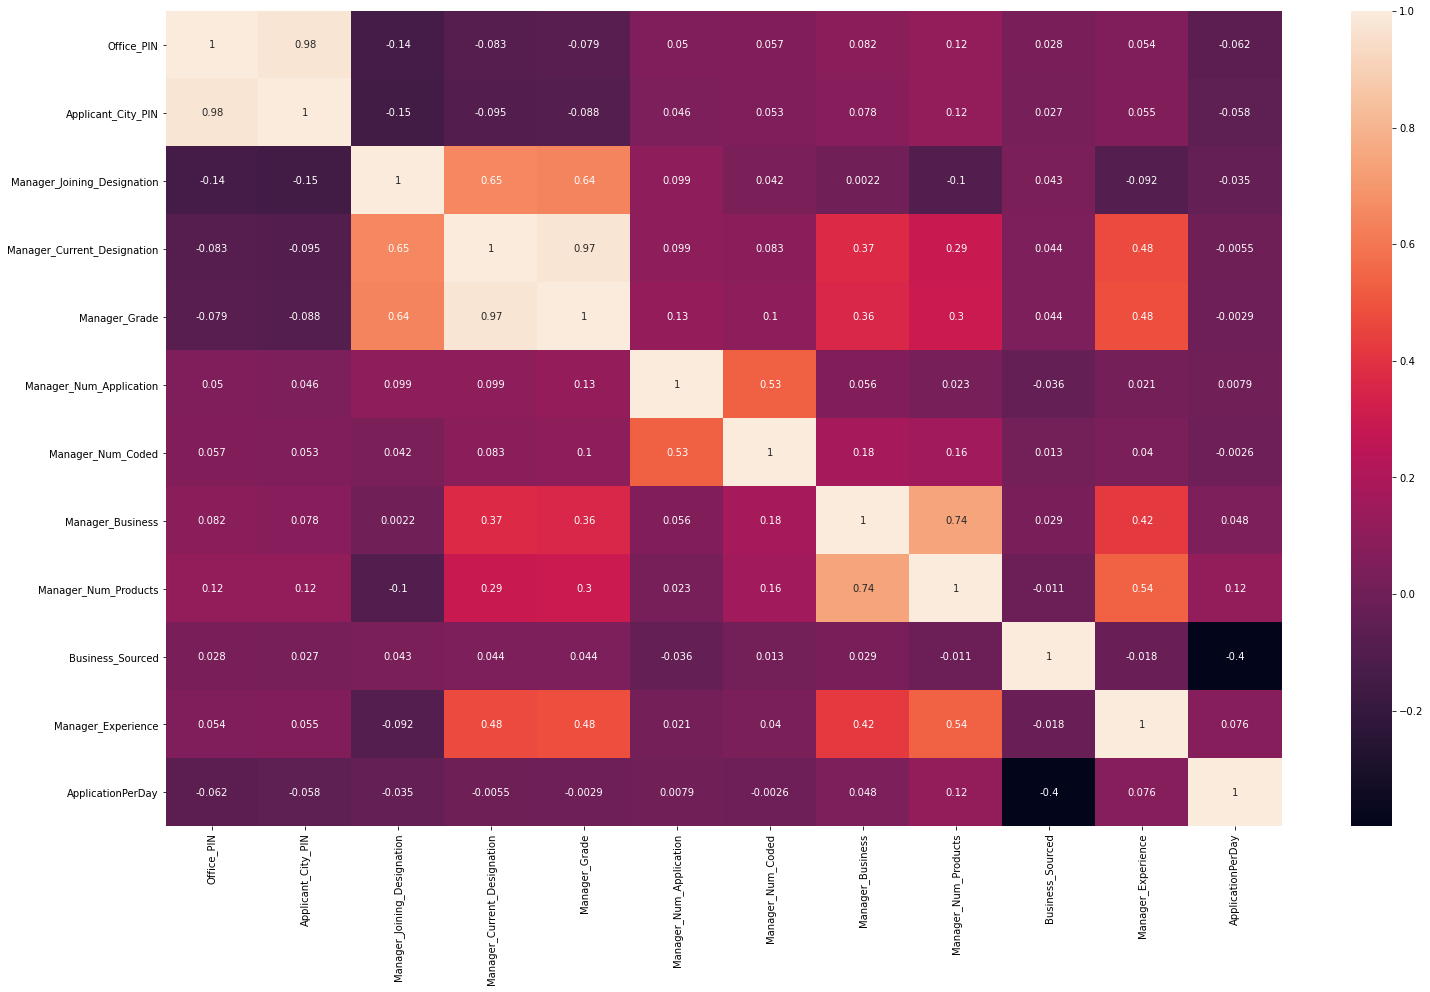

In [161]:
import seaborn as sns
plt.figure(figsize = (25,15))
sns.heatmap(df_train.corr(),annot=True)

## Creating Dummy Variables

In [162]:
df_train.columns

Index(['ID', 'Office_PIN', 'Application_Receipt_Date', 'Applicant_City_PIN',
       'Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Joining_Designation',
       'Manager_Current_Designation', 'Manager_Grade', 'Manager_Status',
       'Manager_Gender', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Business_Sourced',
       'Applicant_age', 'Manager_age', 'Manager_Experience',
       'ApplicationPerDay', 'Promotion_Status'],
      dtype='object')

In [163]:
#drop ID column
df_train.drop(['ID','Applicant_City_PIN','Office_PIN'],axis=1,inplace=True)
df_test.drop(['Applicant_City_PIN','Office_PIN'],axis=1,inplace=True)

In [164]:
cat_cols =df_train.columns[(df_train.dtypes =='object') | (df_train.dtypes=='category')]
cat_cols

Index(['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Status', 'Manager_Gender',
       'Applicant_age', 'Manager_age', 'Promotion_Status'],
      dtype='object')

In [165]:
dummies = pd.get_dummies(df_train[cat_cols],drop_first=True)

In [166]:
df_train = pd.concat([df_train,dummies],axis=1)
df_train = df_train.drop(cat_cols,axis=1)
df_train.head()

,Application_Receipt_Date,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Manager_Experience,ApplicationPerDay,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Applicant_Occupation_missing,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Masters of Business Administration,Applicant_Qualification_Other Associate / Fellow,Applicant_Qualification_Others,Manager_Status_Probation,Manager_Status_missing,Manager_Gender_M,Applicant_age_30-40,Applicant_age_40-50,Applicant_age_50-60,Applicant_age_60-70,Applicant_age_70-80,Applicant_age_80-90,Applicant_age_90-100,Applicant_age_greater thn 100,Manager_age_30-40,Manager_age_40-50,Manager_age_50-60,Manager_age_60-70,Manager_age_70-80,Manager_age_80-90,Manager_age_90-100,Manager_age_greater thn 100,Promotion_Status_promoted,Promotion_Status_same
0,5233 days,1,2,3.0,2.0,1.0,670498.0,56.0,0,15.0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,5233 days,1,2,3.0,2.0,1.0,670498.0,56.0,1,15.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,5233 days,1,1,2.0,0.0,0.0,714368.0,48.0,0,15.0,3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,5233 days,1,3,4.0,0.0,0.0,636712.0,44.0,0,17.0,4,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5233 days,1,1,2.0,2.0,1.0,460804.0,34.0,0,15.0,5,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [167]:
solution_id=df_test.drop('ID',axis=1,inplace=True)

In [168]:
cat_cols =df_test.columns[(df_test.dtypes =='object') | (df_test.dtypes=='category')]
cat_cols

Index(['Applicant_Gender', 'Applicant_Marital_Status', 'Applicant_Occupation',
       'Applicant_Qualification', 'Manager_Status', 'Manager_Gender',
       'Applicant_age', 'Manager_age', 'Promotion_Status'],
      dtype='object')

In [169]:
dummies = pd.get_dummies(df_test[cat_cols],drop_first=True)
df_test = pd.concat([df_test,dummies],axis=1)
df_test = df_test.drop(cat_cols,axis=1)
df_test.head()

,Application_Receipt_Date,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Experience,ApplicationPerDay,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Applicant_Occupation_missing,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Masters of Business Administration,Applicant_Qualification_Other Associate / Fellow,Applicant_Qualification_Others,Manager_Status_Probation,Manager_Status_missing,Manager_Gender_M,Applicant_age_30-40,Applicant_age_40-50,Applicant_age_50-60,Applicant_age_60-70,Applicant_age_70-80,Applicant_age_80-90,Applicant_age_90-100,Applicant_age_greater thn 100,Manager_age_30-40,Manager_age_40-50,Manager_age_50-60,Manager_age_60-70,Manager_age_70-80,Manager_age_80-90,Manager_age_90-100,Manager_age_greater thn 100,Promotion_Status_promoted,Promotion_Status_same
0,2008-07-02,1,1,2.0,1.0,0.0,0.0,0.0,13.0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,2008-07-02,1,1,2.0,2.0,0.0,0.0,0.0,13.0,2,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
2,2008-07-02,0,0,0.0,0.0,0.0,0.0,0.0,13.0,3,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,2008-07-02,0,0,0.0,0.0,0.0,0.0,0.0,13.0,4,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,2008-07-02,2,2,3.0,4.0,1.0,194704.0,6.0,13.0,5,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [170]:
df_train.shape, df_test.shape

((9527, 46), (5045, 45))

In [171]:
df_train.columns, df_test.columns

(Index(['Application_Receipt_Date', 'Manager_Joining_Designation',
        'Manager_Current_Designation', 'Manager_Grade',
        'Manager_Num_Application', 'Manager_Num_Coded', 'Manager_Business',
        'Manager_Num_Products', 'Business_Sourced', 'Manager_Experience',
        'ApplicationPerDay', 'Applicant_Gender_M', 'Applicant_Marital_Status_M',
        'Applicant_Marital_Status_S', 'Applicant_Marital_Status_W',
        'Applicant_Occupation_Others', 'Applicant_Occupation_Salaried',
        'Applicant_Occupation_Self Employed', 'Applicant_Occupation_Student',
        'Applicant_Occupation_missing', 'Applicant_Qualification_Class XII',
        'Applicant_Qualification_Graduate',
        'Applicant_Qualification_Masters of Business Administration',
        'Applicant_Qualification_Other Associate / Fellow',
        'Applicant_Qualification_Others', 'Manager_Status_Probation',
        'Manager_Status_missing', 'Manager_Gender_M', 'Applicant_age_30-40',
        'Applicant_age_40-50',

In [172]:
df_train.head()

,Application_Receipt_Date,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Manager_Experience,ApplicationPerDay,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Applicant_Occupation_missing,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Masters of Business Administration,Applicant_Qualification_Other Associate / Fellow,Applicant_Qualification_Others,Manager_Status_Probation,Manager_Status_missing,Manager_Gender_M,Applicant_age_30-40,Applicant_age_40-50,Applicant_age_50-60,Applicant_age_60-70,Applicant_age_70-80,Applicant_age_80-90,Applicant_age_90-100,Applicant_age_greater thn 100,Manager_age_30-40,Manager_age_40-50,Manager_age_50-60,Manager_age_60-70,Manager_age_70-80,Manager_age_80-90,Manager_age_90-100,Manager_age_greater thn 100,Promotion_Status_promoted,Promotion_Status_same
0,5233 days,1,2,3.0,2.0,1.0,670498.0,56.0,0,15.0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,5233 days,1,2,3.0,2.0,1.0,670498.0,56.0,1,15.0,2,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,5233 days,1,1,2.0,0.0,0.0,714368.0,48.0,0,15.0,3,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,5233 days,1,3,4.0,0.0,0.0,636712.0,44.0,0,17.0,4,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,5233 days,1,1,2.0,2.0,1.0,460804.0,34.0,0,15.0,5,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [173]:
checknullvalues(df_train)

Application_Receipt_Date                                      0.0
Manager_Joining_Designation                                   0.0
Manager_Current_Designation                                   0.0
Manager_Grade                                                 0.0
Manager_Num_Application                                       0.0
Manager_Num_Coded                                             0.0
Manager_Business                                              0.0
Manager_Num_Products                                          0.0
Business_Sourced                                              0.0
Manager_Experience                                            0.0
ApplicationPerDay                                             0.0
Applicant_Gender_M                                            0.0
Applicant_Marital_Status_M                                    0.0
Applicant_Marital_Status_S                                    0.0
Applicant_Marital_Status_W                                    0.0
Applicant_

In [174]:
# df_train['Application_Month']=df_train['Application_Receipt_Date'].apply(lambda x: x.month)
# df_train['Application_Day']=df_train['Application_Receipt_Date'].apply(lambda x: x.day)
# df_train['Application_Year']=df_train['Application_Receipt_Date'].apply(lambda x: x.year)
# df_train['Application_WeekDay']=df_train['Application_Receipt_Date'].apply(lambda x: x.weekday())

# df_train['Manager_Month']=df_train['Manager_DOJ'].apply(lambda x: x.month)
# df_train['Manager_Day']=df_train['Manager_DOJ'].apply(lambda x: x.day)
# df_train['Manager_Year']=df_train['Manager_DOJ'].apply(lambda x: x.year)
# df_train['Manager_WeekDay']=df_train['Manager_DOJ'].apply(lambda x: x.weekday())

In [175]:
# df_test['Application_Month']=df_test['Application_Receipt_Date'].apply(lambda x: x.month)
# df_test['Application_Day']=df_test['Application_Receipt_Date'].apply(lambda x: x.day)
# df_test['Application_Year']=df_test['Application_Receipt_Date'].apply(lambda x: x.year)
# df_test['Application_WeekDay']=df_test['Application_Receipt_Date'].apply(lambda x: x.weekday())

# df_test['Manager_Month']=df_test['Manager_DOJ'].apply(lambda x: x.month)
# df_test['Manager_Day']=df_test['Manager_DOJ'].apply(lambda x: x.day)
# df_test['Manager_Year']=df_test['Manager_DOJ'].apply(lambda x: x.year)
# df_test['Manager_WeekDay']=df_test['Manager_DOJ'].apply(lambda x: x.weekday())

In [176]:
df_train.drop(['Application_Receipt_Date'],axis=1,inplace=True)
df_test.drop(['Application_Receipt_Date'],axis=1,inplace=True)

In [177]:
df_train.tail()

,Manager_Joining_Designation,Manager_Current_Designation,Manager_Grade,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Business_Sourced,Manager_Experience,ApplicationPerDay,Applicant_Gender_M,Applicant_Marital_Status_M,Applicant_Marital_Status_S,Applicant_Marital_Status_W,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student,Applicant_Occupation_missing,Applicant_Qualification_Class XII,Applicant_Qualification_Graduate,Applicant_Qualification_Masters of Business Administration,Applicant_Qualification_Other Associate / Fellow,Applicant_Qualification_Others,Manager_Status_Probation,Manager_Status_missing,Manager_Gender_M,Applicant_age_30-40,Applicant_age_40-50,Applicant_age_50-60,Applicant_age_60-70,Applicant_age_70-80,Applicant_age_80-90,Applicant_age_90-100,Applicant_age_greater thn 100,Manager_age_30-40,Manager_age_40-50,Manager_age_50-60,Manager_age_60-70,Manager_age_70-80,Manager_age_80-90,Manager_age_90-100,Manager_age_greater thn 100,Promotion_Status_promoted,Promotion_Status_same
9522,2,2,3.0,0.0,0.0,0.0,0.0,0,13.0,14,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9523,0,0,0.0,0.0,0.0,0.0,0.0,0,13.0,15,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9524,2,2,3.0,0.0,0.0,621901.0,17.0,0,14.0,16,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
9525,3,3,4.0,0.0,0.0,0.0,0.0,0,13.0,17,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
9526,0,0,0.0,0.0,0.0,0.0,0.0,0,13.0,18,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


## Train Test Split

In [178]:
Y = df_train['Business_Sourced']
X = df_train.drop('Business_Sourced',axis=1)

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=10)

In [180]:
x_train.columns

Index(['Manager_Joining_Designation', 'Manager_Current_Designation',
       'Manager_Grade', 'Manager_Num_Application', 'Manager_Num_Coded',
       'Manager_Business', 'Manager_Num_Products', 'Manager_Experience',
       'ApplicationPerDay', 'Applicant_Gender_M', 'Applicant_Marital_Status_M',
       'Applicant_Marital_Status_S', 'Applicant_Marital_Status_W',
       'Applicant_Occupation_Others', 'Applicant_Occupation_Salaried',
       'Applicant_Occupation_Self Employed', 'Applicant_Occupation_Student',
       'Applicant_Occupation_missing', 'Applicant_Qualification_Class XII',
       'Applicant_Qualification_Graduate',
       'Applicant_Qualification_Masters of Business Administration',
       'Applicant_Qualification_Other Associate / Fellow',
       'Applicant_Qualification_Others', 'Manager_Status_Probation',
       'Manager_Status_missing', 'Manager_Gender_M', 'Applicant_age_30-40',
       'Applicant_age_40-50', 'Applicant_age_50-60', 'Applicant_age_60-70',
       'Applicant_age_7

## Model Building

In [181]:
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, confusion_matrix

from sklearn import metrics

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score

In [182]:
param_test1 = {
 'max_depth':[10,13,15],
 'n_estimators':[80,100,120],
 'reg_alpha':[12,14,16],
}
xgb1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=12,
 gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
xgb1.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, gamma=0, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_delta_step=None,
                                     max_depth=12, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=1, seed=27, subsample=0.8,
                                     tree_met

In [183]:
xgb1.best_params_, xgb1.best_score_

({'max_depth': 15, 'n_estimators': 100, 'reg_alpha': 14}, 0.8051921646592282)

In [184]:
xgb1.score(x_train,y_train)

0.8406956041561993

In [185]:
xgb1.score(x_test,y_test)

0.8092044250132484

In [186]:

y_pred = xgb1.predict(x_train)

In [187]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [188]:
xgb1.predict_proba(x_train)

array([[0.8714142 , 0.12858585],
       [0.5954778 , 0.40452215],
       [0.6265361 , 0.37346393],
       ...,
       [0.6246586 , 0.37534145],
       [0.43001288, 0.5699871 ],
       [0.8876192 , 0.11238082]], dtype=float32)

In [189]:
xgb1.predict(x_train)

array([0, 0, 0, ..., 0, 1, 0])

In [190]:
fpr, tpr, thresholds = metrics.roc_curve( y_train.values, pd.DataFrame(xgb1.predict_proba(x_train))[1], drop_intermediate = False )

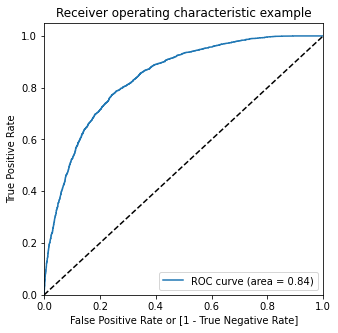

In [191]:
draw_roc(y_train,pd.DataFrame(xgb1.predict_proba(x_train))[1])

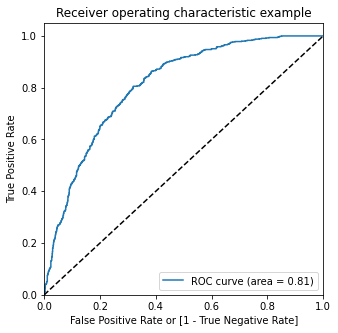

In [192]:
draw_roc(y_test,pd.DataFrame(xgb1.predict_proba(x_test))[1])

In [193]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':pd.DataFrame(xgb1.predict_proba(x_train))[1].values})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,1,0.128586
1,1,0.404522
2,0,0.373464
3,0,0.071243
4,0,0.070652


In [194]:

#numbers = [float(x)/10.0 for x in range(3,4,0.1)]
numbers=[3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4,4.1,4.2,4.3,4.4,4.5]
for i in numbers:
    y_train_pred_final[round(float(i)/10,2)]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > float(i)/10 else 0)
y_train_pred_final.head(10)

,Converted,Conversion_Prob,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45
0,1,0.128586,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.404522,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0
2,0,0.373464,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
3,0,0.071243,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.070652,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0.263897,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0.125854,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0.075588,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0.231605,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0.718952,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [195]:
y_train_pred_final.tail()

,Converted,Conversion_Prob,0.3,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45
7616,0,0.607619,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7617,0,0.464351,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7618,1,0.375341,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0
7619,0,0.569987,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
7620,0,0.112381,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [196]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
num = [0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,0.4,0.41,0.42,0.43,0.44,0.45]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.30  0.30  0.728513  0.836197  0.672131
0.31  0.31  0.732056  0.825506  0.683127
0.32  0.32  0.734680  0.819397  0.690324
0.33  0.33  0.738879  0.811760  0.700720
0.34  0.34  0.744128  0.805651  0.711915
0.35  0.35  0.747540  0.798015  0.721112
0.36  0.36  0.752788  0.791142  0.732707
0.37  0.37  0.758168  0.781596  0.745902
0.38  0.38  0.761317  0.773578  0.754898
0.39  0.39  0.762761  0.765178  0.761495
0.40  0.40  0.763679  0.754868  0.768293
0.41  0.41  0.764335  0.744177  0.774890
0.42  0.42  0.767747  0.735013  0.784886
0.43  0.43  0.769584  0.724322  0.793283
0.44  0.44  0.771027  0.715922  0.799880
0.45  0.45  0.772996  0.704849  0.808677


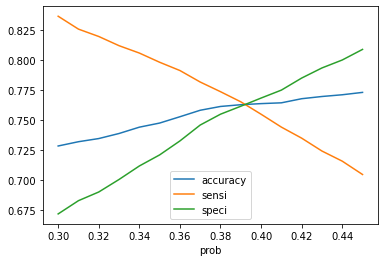

In [197]:
# Checking the cutoff value

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [198]:
prob_cutoff = 0.39

In [199]:
y_train_pred_final['final'] = y_train_pred_final.Conversion_Prob.apply(lambda x : 1 if x>=prob_cutoff else 0)

In [200]:
y_train_pred_final['final']

0       0
1       1
2       0
3       0
4       0
       ..
7616    1
7617    1
7618    0
7619    1
7620    0
Name: final, Length: 7621, dtype: int64

In [201]:
y_train

9015    1
7660    1
1424    0
467     0
6110    0
       ..
9372    0
7291    0
1344    1
7293    0
1289    0
Name: Business_Sourced, Length: 7621, dtype: int64

In [202]:
xgb1.predict_proba(df_test)

array([[0.32875508, 0.6712449 ],
       [0.34987092, 0.6501291 ],
       [0.3763585 , 0.6236415 ],
       ...,
       [0.96904546, 0.03095452],
       [0.9736018 , 0.02639815],
       [0.9668422 , 0.0331578 ]], dtype=float32)

In [203]:
test=pd.read_csv(test_dataset_url)
ids=test['ID']

In [204]:
ids

0       FIN1009528
1       FIN1009529
2       FIN1009530
3       FIN1009531
4       FIN1009532
           ...    
5040    FIN1014568
5041    FIN1014569
5042    FIN1014570
5043    FIN1014571
5044    FIN1014572
Name: ID, Length: 5045, dtype: object

In [205]:
pd.DataFrame({'Business_Sourced':xgb1.predict(df_test)})

,Business_Sourced
0,1
1,1
2,1
3,1
4,1
...,...
5040,0
5041,0
5042,0
5043,0


In [206]:
final_output = pd.DataFrame({'ID':ids,'Business_Sourced':xgb1.predict(df_test)})
final_output.to_csv('output_final.csv', index=False)
final_output.head()

,ID,Business_Sourced
0,FIN1009528,1
1,FIN1009529,1
2,FIN1009530,1
3,FIN1009531,1
4,FIN1009532,1


In [207]:
xgb1.best_estimator_.feature_importances_

array([0.01533783, 0.01558036, 0.01956153, 0.01497349, 0.01244974,
       0.02392743, 0.01455263, 0.01799268, 0.44197655, 0.02227215,
       0.00910444, 0.00945351, 0.        , 0.02838398, 0.01693045,
       0.0198181 , 0.01957737, 0.01624626, 0.02096628, 0.02839671,
       0.00793947, 0.00211212, 0.01372506, 0.01319934, 0.01244165,
       0.01688983, 0.01570208, 0.01372426, 0.01675294, 0.01151   ,
       0.02648561, 0.0068817 , 0.        , 0.        , 0.01420833,
       0.0126281 , 0.01134725, 0.01790353, 0.        , 0.        ,
       0.        , 0.        , 0.01504382, 0.00400344], dtype=float32)

In [208]:
feature_importance = pd.DataFrame({'Features':x_train.columns,'Feature_importance':xgb1.best_estimator_.feature_importances_}).sort_values(by='Feature_importance',ascending=False)
feature_importance.to_csv('features.csv', index=False)
feature_importance.head(20)

,Features,Feature_importance
8,ApplicationPerDay,0.441977
19,Applicant_Qualification_Graduate,0.028397
13,Applicant_Occupation_Others,0.028384
30,Applicant_age_70-80,0.026486
5,Manager_Business,0.023927
9,Applicant_Gender_M,0.022272
18,Applicant_Qualification_Class XII,0.020966
15,Applicant_Occupation_Self Employed,0.019818
16,Applicant_Occupation_Student,0.019577
2,Manager_Grade,0.019562


In [209]:
from sklearn.ensemble import RandomForestClassifier

In [210]:
model_RF = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
                       n_estimators=300, n_jobs=-1, random_state=100,class_weight="balanced")

In [211]:
model_RF = model_RF.fit(x_train, y_train)

In [212]:
model_RF = RandomForestClassifier(max_depth=20, max_features=4, min_samples_leaf=50,
n_estimators=300, n_jobs=-1, random_state=100,class_weight="balanced")

In [213]:
model_RF.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=20, max_features=4,
                       min_samples_leaf=50, n_estimators=300, n_jobs=-1,
                       random_state=100)

In [214]:
y_pred = model_RF.predict(x_test)

In [215]:
from sklearn.metrics import  precision_score, recall_score, roc_auc_score, roc_curve,f1_score

In [216]:
y_pred_train = model_RF.predict(x_train)
acc_score = round(accuracy_score( y_train,y_pred_train)*100,2)
acc_score

72.8

In [217]:
y_pred = model_RF.predict(x_test)
acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score : ',acc_score)
# ROC AUC score
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
# Precision score
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
# Recall score
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)

Accuracy Score :  72.51
ROC AUC score :  74.23
Precision score :  56.83
Recall score :  79.63


In [218]:
classifier_rf = RandomForestClassifier(random_state=100, n_jobs=-1)
params = {
    'max_depth': [8,10,12],
    'min_samples_leaf': [ 20, 40, 60],
    'max_features': [6,8,10,12],
    'n_estimators': [300,400,500]
}
grid_search = GridSearchCV(estimator=classifier_rf, param_grid=params, 
                          cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 108 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   53.3s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  2.1min finished


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=100),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10, 12],
                         'max_features': [6, 8, 10, 12],
                         'min_samples_leaf': [20, 40, 60],
                         'n_estimators': [300, 400, 500]},
             scoring='accuracy', verbose=1)

In [219]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features=10, min_samples_leaf=20,
                       n_estimators=300, n_jobs=-1, random_state=100)

In [220]:
model = grid_search.best_estimator_

y_pred = model.predict(x_test)
acc_score = round(accuracy_score( y_test,y_pred)*100,2)
print('Accuracy Score(Test) : ',acc_score)
roc_score = round(roc_auc_score(y_test,y_pred)*100,2)
print('ROC AUC score : ',roc_score)
prec_score = round(precision_score( y_test,y_pred)*100,2)
print('Precision score : ', prec_score)
rec_score = round(recall_score(y_test,y_pred)*100,2)
print('Recall score : ', rec_score)

Accuracy Score(Test) :  74.66
ROC AUC score :  70.33
Precision score :  64.45
Recall score :  56.79


So, I used the XGB model for final result.

# Thank You